# Import necessary dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
%matplotlib inline

# Load datasets and Reviews features

In [2]:
data = pd.read_csv('./accuracy_full.csv')

In [3]:
data.head() 

,Unnamed: 0,clf name & configuration,AP,MagicTelescope,abalone,anneal,ar1,arrhythmia,audiology,autos,...,soybean,spambase,splice,teachingAssistant,tic-tac-toe,vote,vowel,waveform-5000,yeast,zoo
0,7c81560b1f077f25e0dd594f5bf4ad86,weka.classifiers.bayes.NaiveBayes-['-K'],0.9615,0.9967,0.6253,0.8608,0.8843,0.6504,0.7168,0.6780,...,0.9444,0.9854,0.9991,0.5497,0.9958,0.9011,0.6909,0.8012,0.6098,0.9604
1,1d516aebeabbf2a07ca7e8ebe18d97c8,"weka.classifiers.bayes.BayesNet-['-Q', 'weka.c...",NaN,0.8395,0.5688,NaN,0.9256,NaN,NaN,NaN,...,NaN,NaN,NaN,0.5166,0.9019,0.9655,0.7374,NaN,0.5761,0.9505
2,aa8e22e74a528ca8c34f022da26e6b6e,weka.classifiers.bayes.NaiveBayes-[],0.9594,0.8944,0.5808,0.6882,0.8595,0.6173,0.7168,0.6098,...,0.9312,0.8133,0.9925,0.5298,0.9916,0.9011,0.6303,0.7998,0.5856,0.9406
3,e4703dbfb0fd5afe7abb4d354a9d37f0,weka.classifiers.bayes.BayesNet-[],NaN,0.9984,0.6299,0.9131,0.9256,0.7168,0.7478,0.7073,...,0.9531,NaN,NaN,0.9073,0.9990,0.9011,0.6253,NaN,0.6004,0.9307
4,caf621af10216ec1210297567df473e1,"weka.classifiers.bayes.BayesNet-['-Q', 'weka.c...",NaN,NaN,0.6775,0.9432,0.9256,NaN,NaN,0.7854,...,0.9327,NaN,NaN,0.9205,0.9990,0.9563,0.8303,NaN,0.6024,NaN


In [4]:
# Prepare a new data inlcude only features datasets ( begin from column 2)
data_history = data.iloc[:, 2:].copy()  

## Descriptive Statistics

In [5]:
data_history.describe()

,AP,MagicTelescope,abalone,anneal,ar1,arrhythmia,audiology,autos,badges2,balance-scale,...,soybean,spambase,splice,teachingAssistant,tic-tac-toe,vote,vowel,waveform-5000,yeast,zoo
count,49.000000,57.000000,61.000000,60.000000,62.000000,57.000000,57.000000,60.000000,61.00000,61.000000,...,60.000000,54.000000,55.000000,61.000000,61.000000,61.000000,61.000000,54.000000,61.000000,59.000000
mean,0.924343,0.914574,0.632536,0.852503,0.905879,0.610765,0.656184,0.669097,0.99883,0.791790,...,0.849243,0.930785,0.869207,0.522961,0.942564,0.950913,0.677630,0.793074,0.541989,0.795780
std,0.046357,0.090206,0.037053,0.063289,0.026954,0.068615,0.160168,0.139438,0.00425,0.084076,...,0.201654,0.072013,0.188026,0.150465,0.090268,0.021099,0.249163,0.080794,0.084657,0.184834
min,0.735000,0.701100,0.536000,0.688200,0.760300,0.440300,0.252200,0.326800,0.96940,0.462400,...,0.131800,0.730700,0.243600,0.324500,0.699400,0.894300,0.090900,0.513200,0.303200,0.405900
25%,0.925200,0.851100,0.601600,0.798400,0.900800,0.559700,0.535400,0.620750,1.00000,0.776000,...,0.889125,0.884550,0.782750,0.410600,0.915400,0.949400,0.630300,0.763150,0.510100,0.643600
50%,0.933800,0.894400,0.645700,0.870800,0.913250,0.623900,0.716800,0.695150,1.00000,0.800000,...,0.925300,0.929900,0.942000,0.529800,0.988500,0.956300,0.755600,0.796600,0.571400,0.901000
75%,0.953000,0.999900,0.657200,0.905600,0.925600,0.661500,0.787600,0.763425,1.00000,0.838400,...,0.941400,0.999250,0.998900,0.582800,0.999000,0.965500,0.819200,0.859950,0.593000,0.920800
max,0.961500,1.000000,0.690200,0.943200,0.933900,0.743400,0.840700,0.863400,1.00000,0.904000,...,0.994100,0.999600,0.999400,0.927200,1.000000,0.974700,0.991900,0.868800,0.651600,0.970300


# I. Analyze each dataset (columns)

## 1. The best dataset

 The first time, we will review each datasets. Corresponding to each this dataset, we wanna know how many algorithms apply to it for the most optimal results. A dataset is called "the best dataset" if it has many algorithms which give high accuracy. 

One of the most effective wayss to visualize the numeric attributes is to use a histogram or a density plot works quit well in understanding how the data is distributed for that attribute.

/home/haipro/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/haipro/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/haipro/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/haipro/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/haipro/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained unt

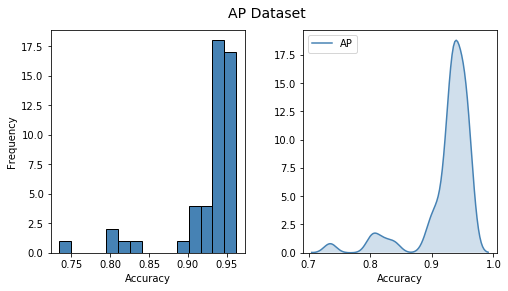

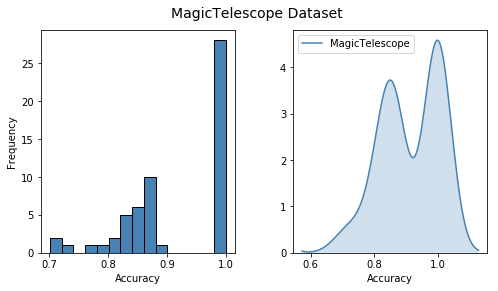

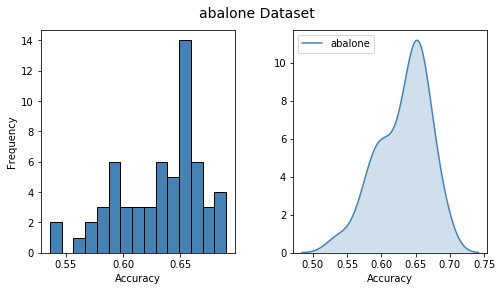

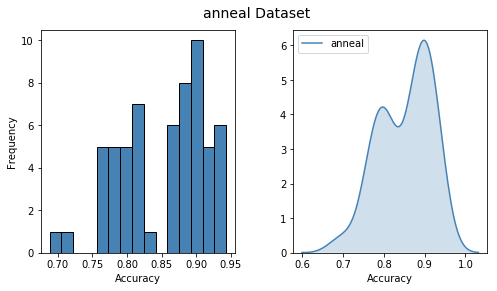

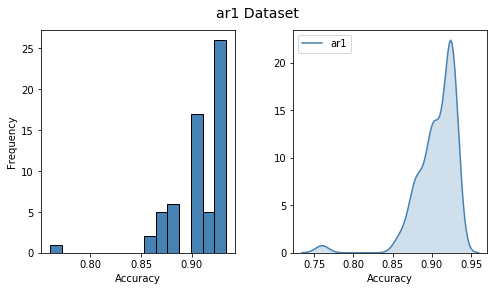

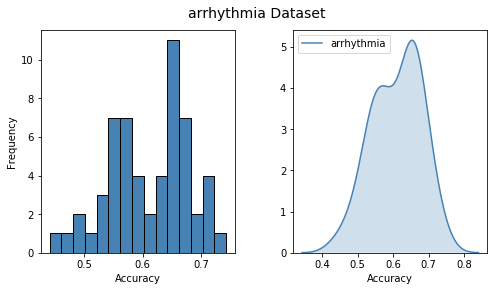

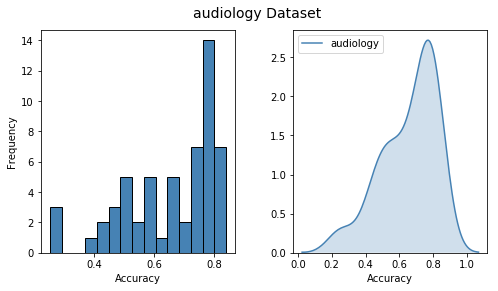

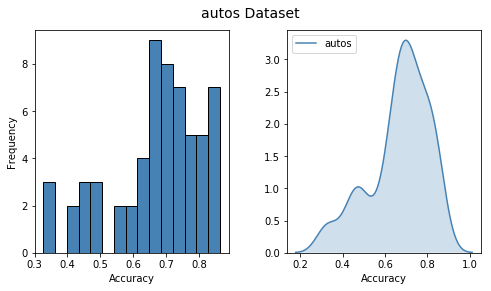

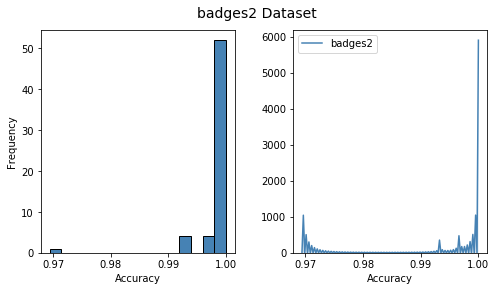

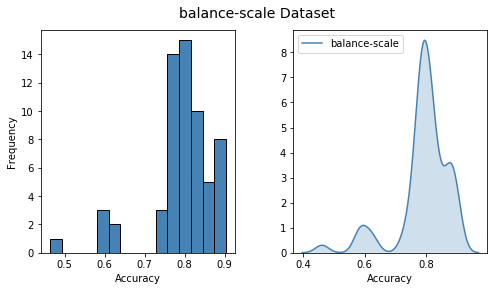

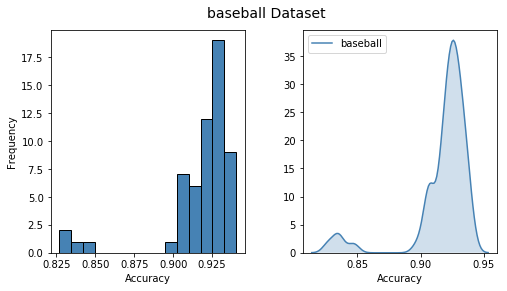

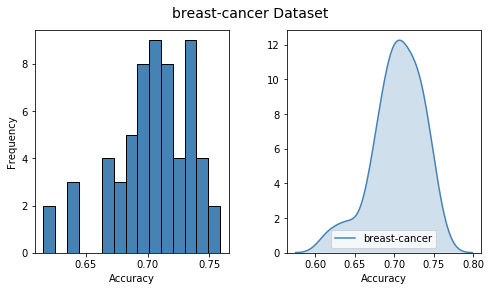

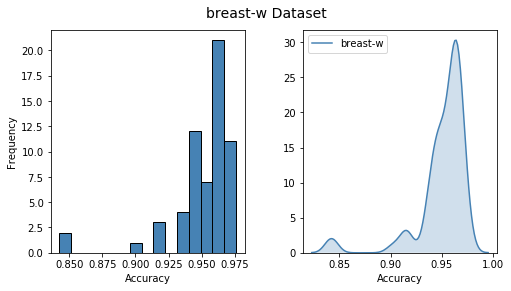

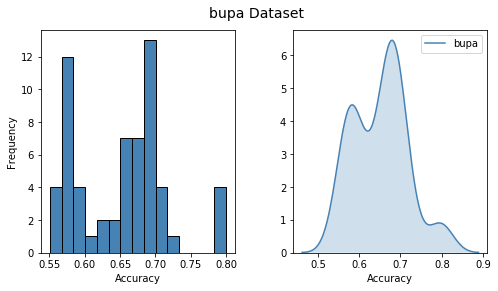

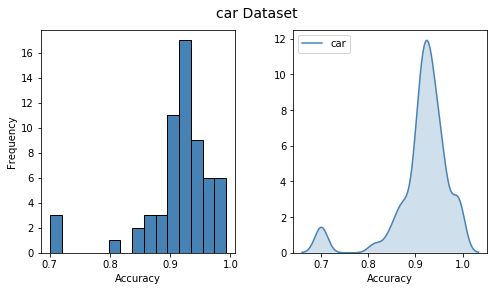

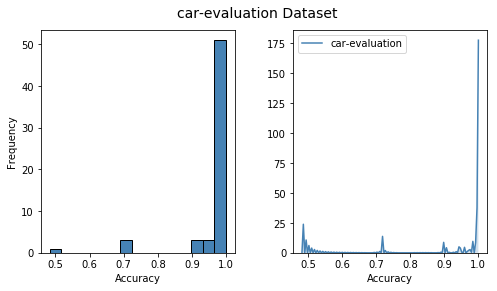

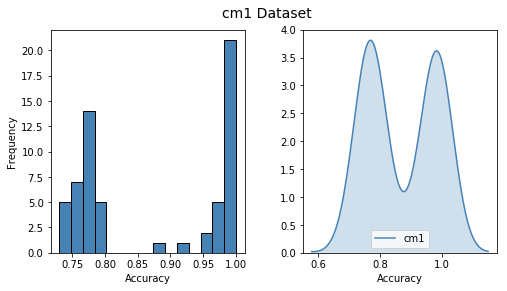

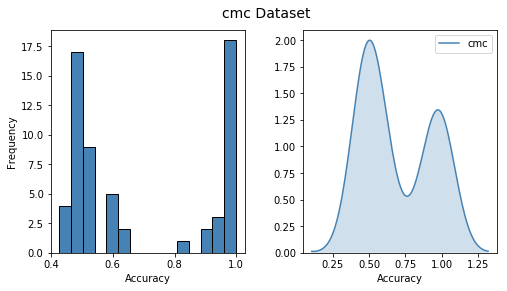

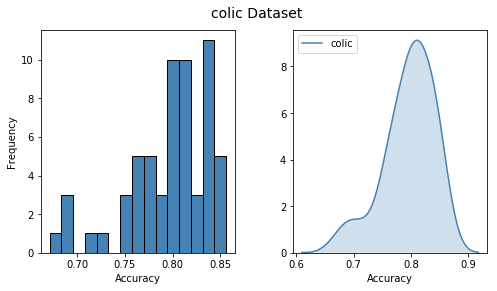

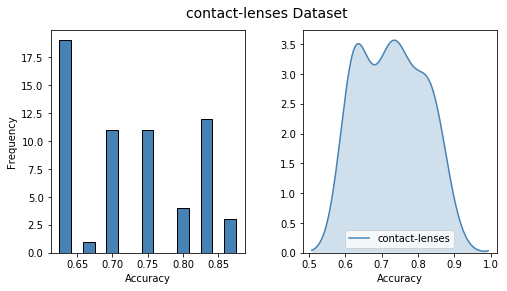

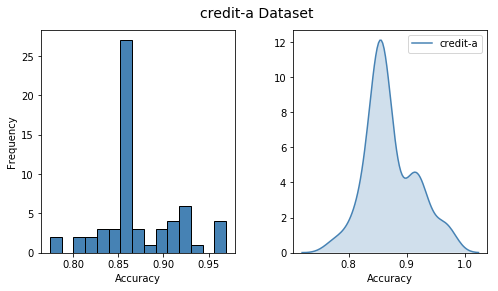

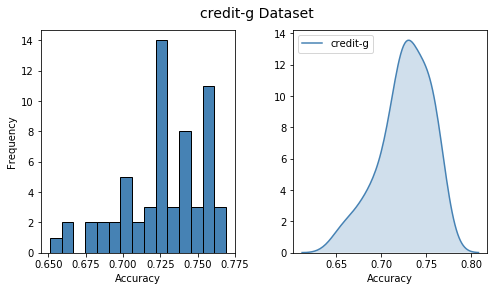

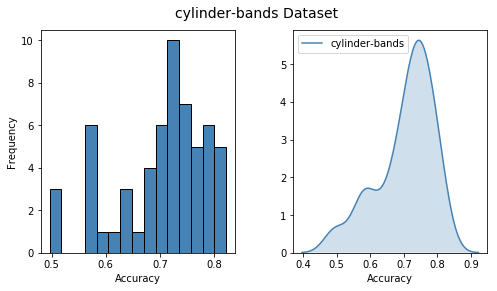

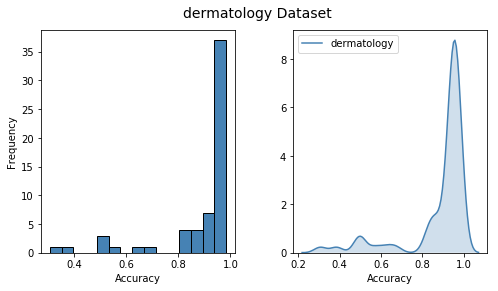

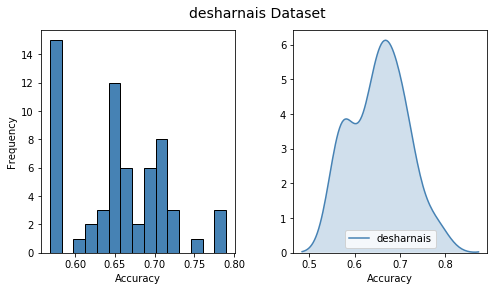

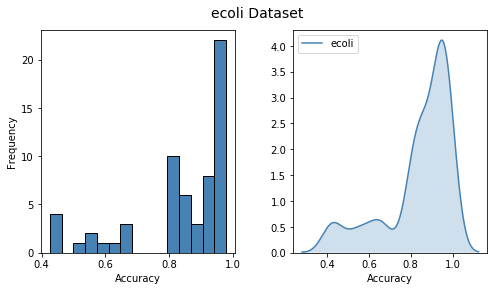

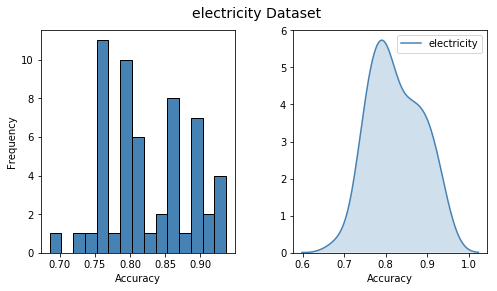

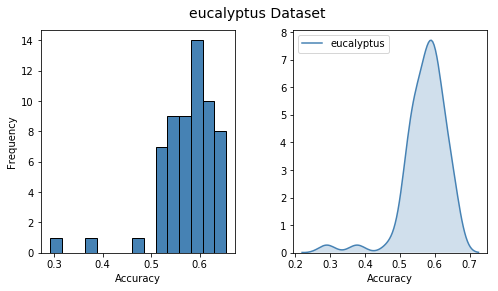

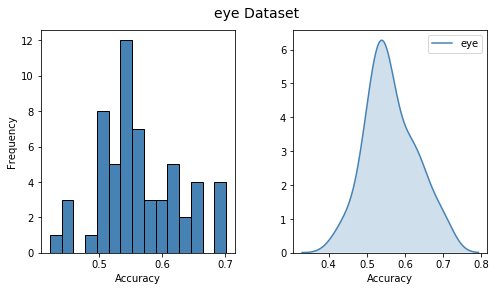

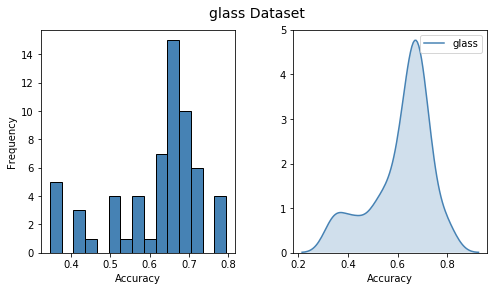

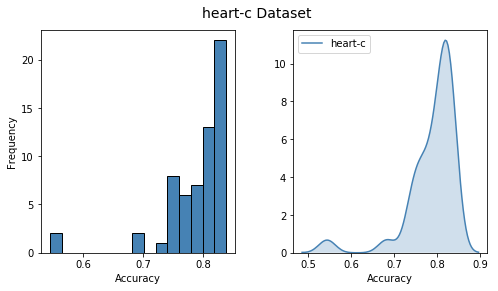

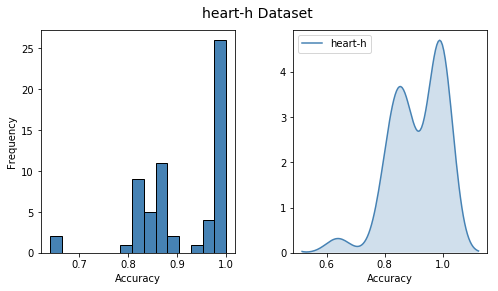

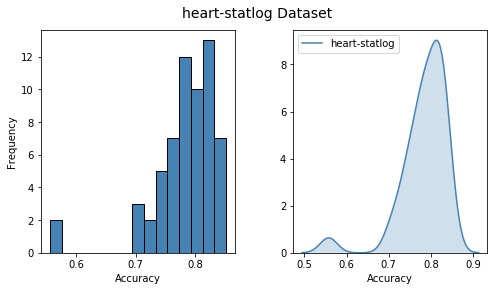

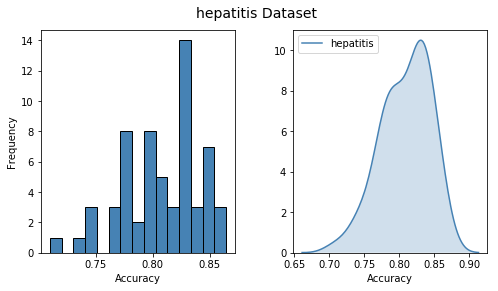

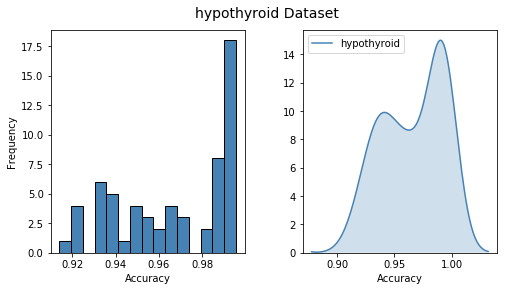

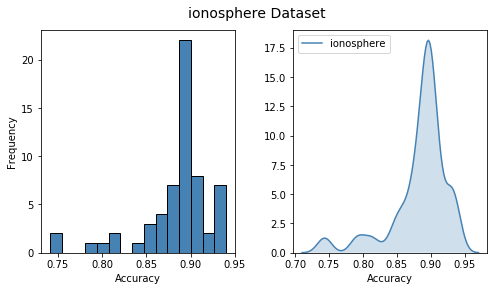

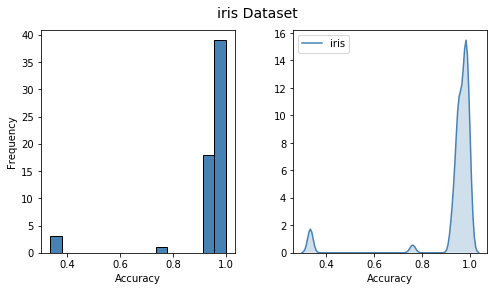

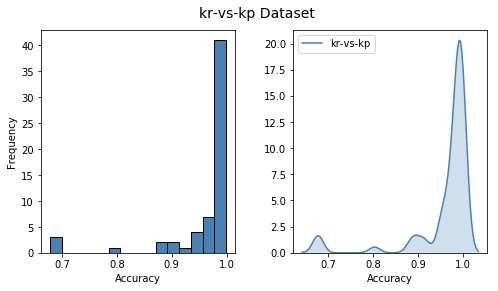

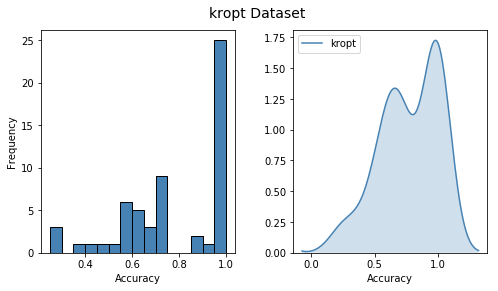

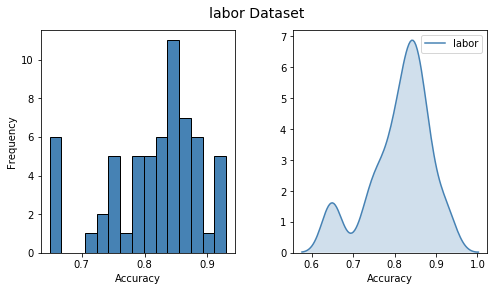

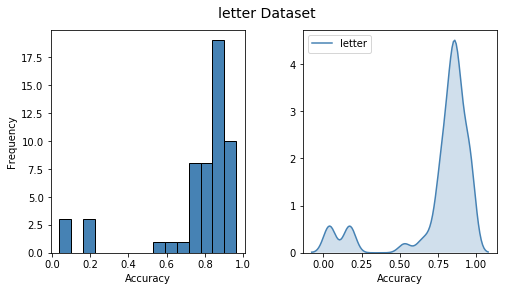

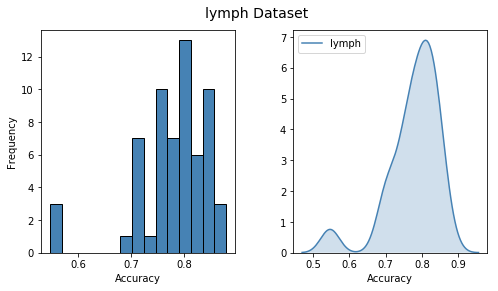

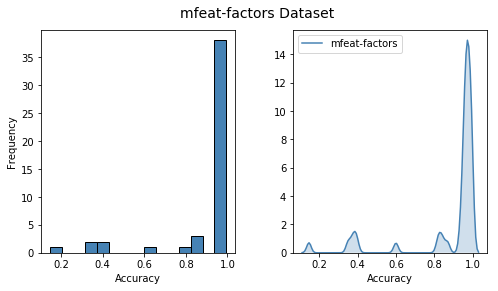

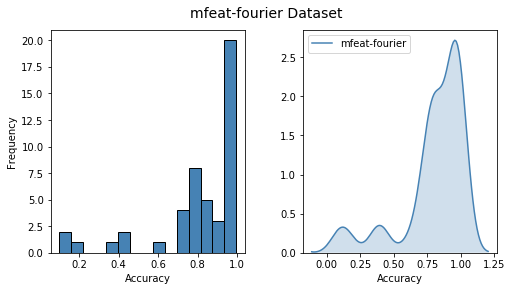

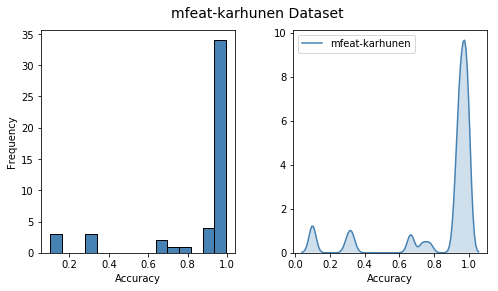

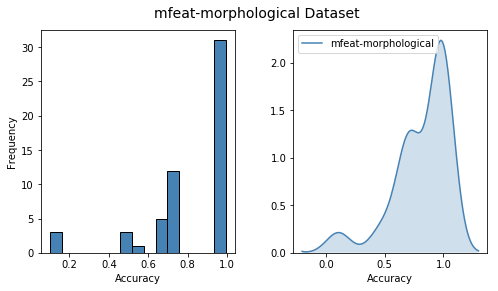

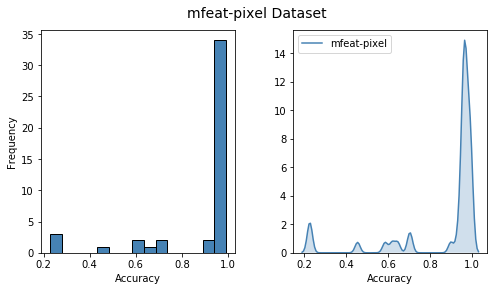

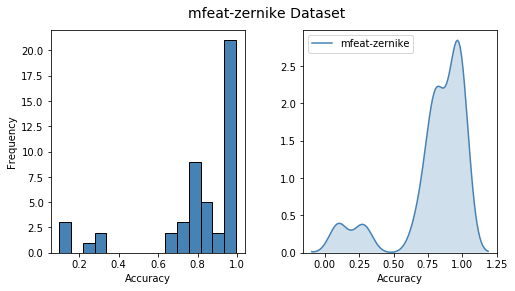

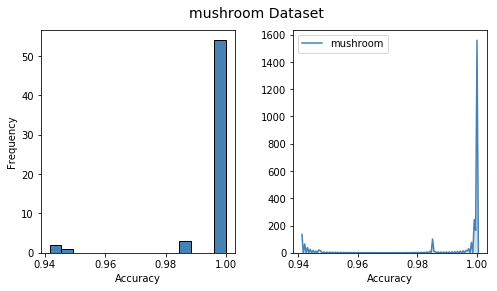

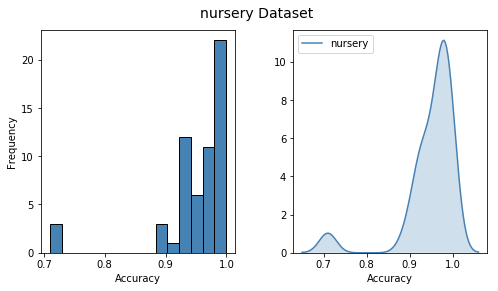

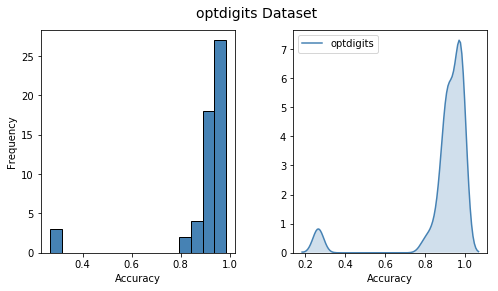

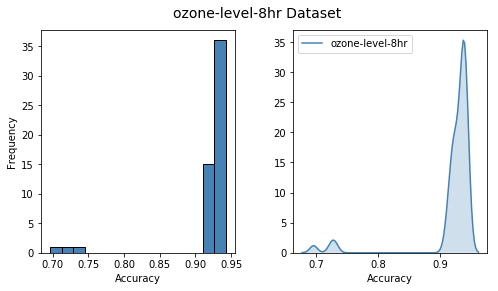

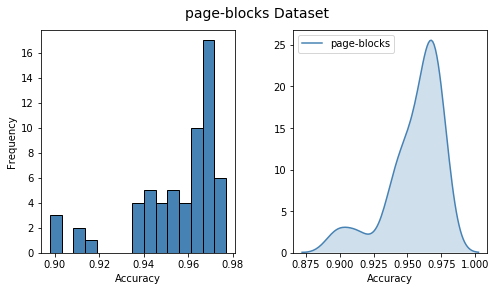

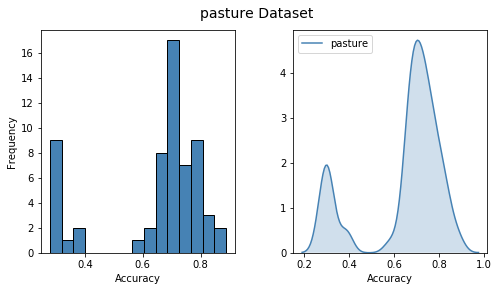

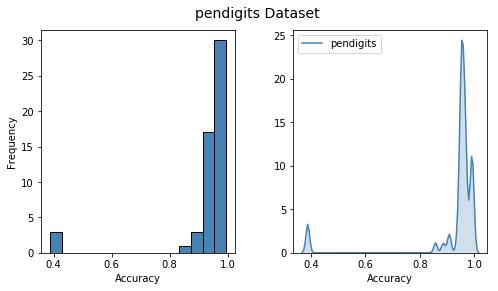

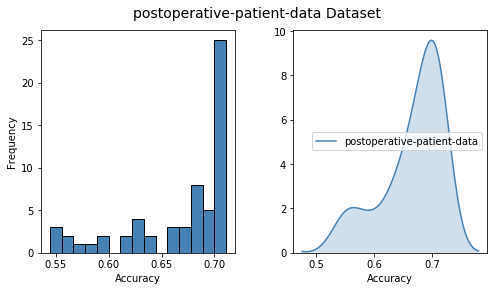

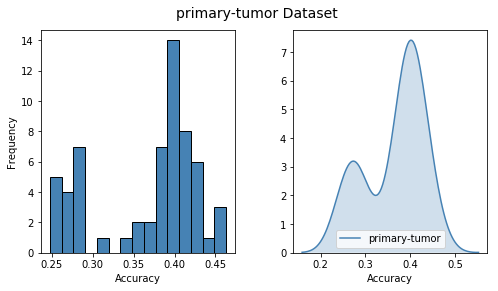

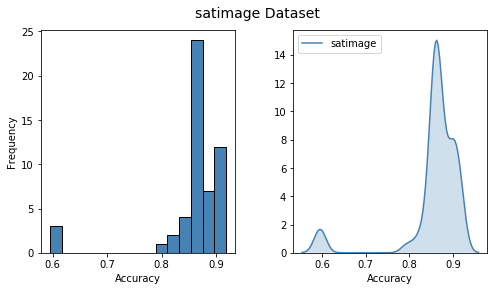

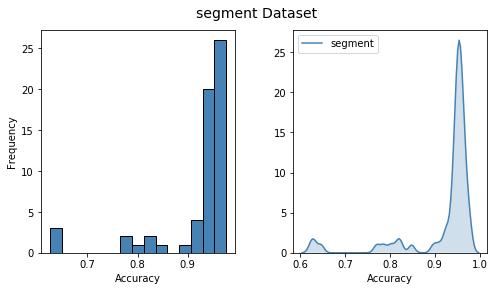

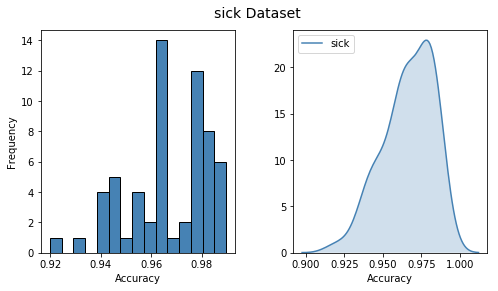

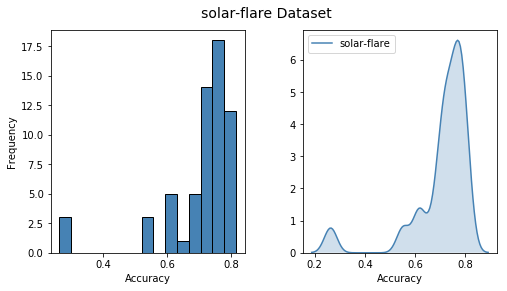

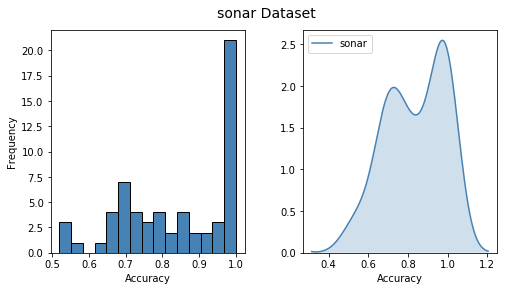

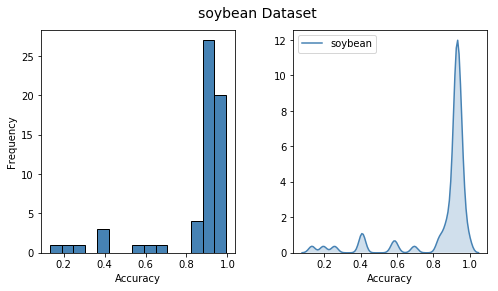

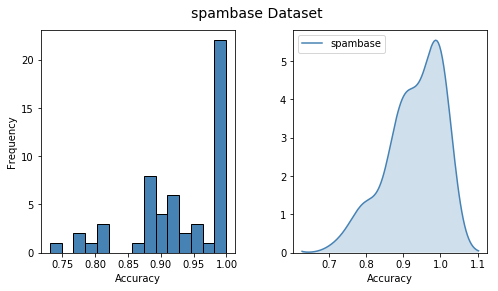

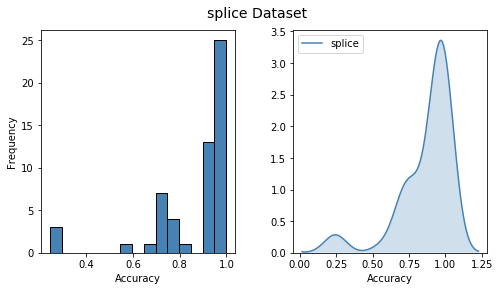

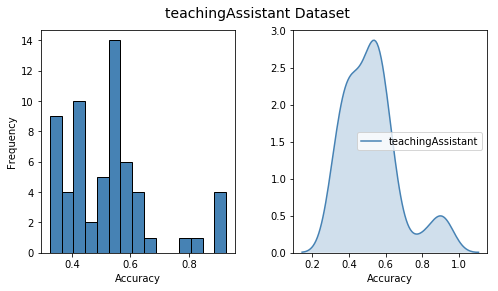

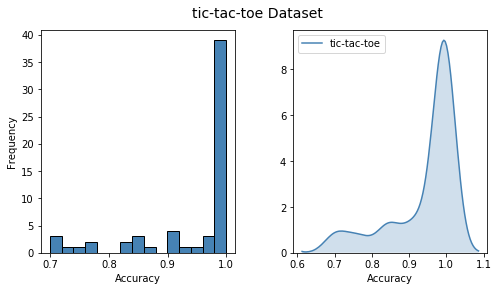

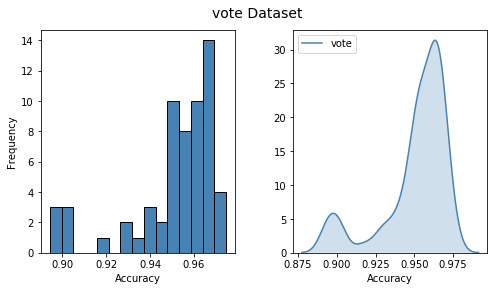

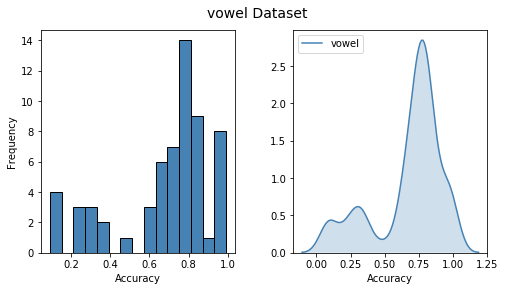

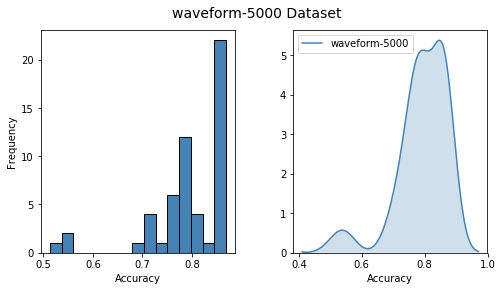

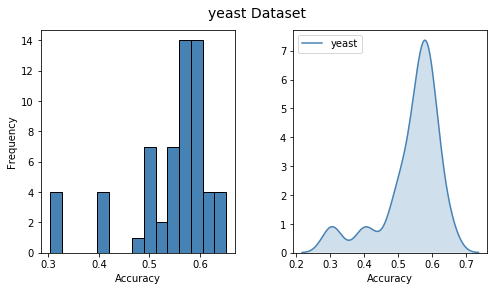

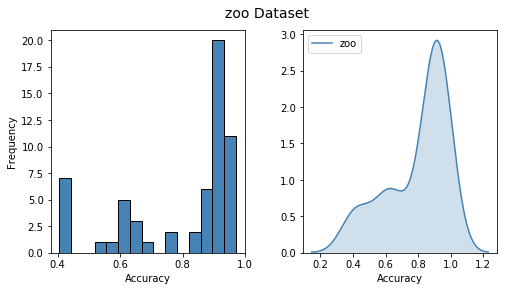

In [6]:
for i in range(72):
    # Histogram 
    
    fig = plt.figure(figsize=(8, 4)) # Create a new figure with the 
    # size 8x4 (unit:inch)
    title = fig.suptitle( data_history.columns.values[i] 
                         + ' Dataset', fontsize=14) # Set title
    fig.subplots_adjust(top=0.9, wspace=0.3) # Set the position of title
    # We'll have 2 subplot, histogram plot is on the left 
    ax = fig.add_subplot(1,2,1) 
    ax.set_xlabel('Accuracy') # Set the name axis-x
    ax.set_ylabel('Frequency') # Set the name axis-y
    freq, bins, patches = ax.hist(data_history.iloc[:,i], 
        color='steelblue', bins=15, edgecolor='black', linewidth=1)
    
    # Density Plot
    fig.subplots_adjust(top=0.9, wspace=0.3)
    ax1 = fig.add_subplot(1,2,2) # density Plot is on the right
    ax1.set_xlabel('Accuracy')
    warning = sns.kdeplot(data_history.iloc[:,i], ax=ax1, 
                          shade=True, color='steelblue')


Based on the above graphs, we check the value mean for each datasets. It's easy to do it.

In [7]:
data_history.mean().idxmax() 

'badges2'

The dataset 'badges2' is the highest mean accuracy. Let's look at the plot of it.

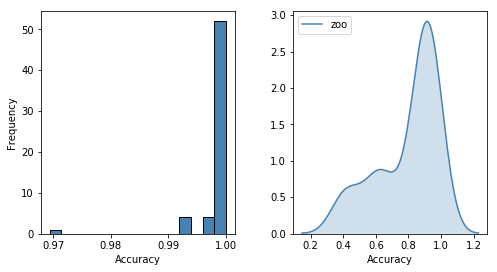

In [8]:
# Histogram 
    
fig = plt.figure(figsize=(8, 4)) # Create a new figure with the size 8x4 (unit:inch)
fig.subplots_adjust(top=0.9, wspace=0.3) # Set the position of title
ax = fig.add_subplot(1,2,1) # We'll have 2 subplot, histogram plot is on the left 
ax.set_xlabel('Accuracy') # Set the name axis-x
ax.set_ylabel('Frequency') # Set the name axis-y
freq, bins, patches = ax.hist(data_history['badges2'], color='steelblue', 
                              bins=15, edgecolor='black', linewidth=1)

# Density Plot
fig.subplots_adjust(top=0.9, wspace=0.3)
ax1 = fig.add_subplot(1,2,2) # density Plot is on the right
ax1.set_xlabel('Accuracy')
warning = sns.kdeplot(data_history.iloc[:,i], ax=ax1, shade=True, color='steelblue')

That's great, it has about 50 algorithms apply for it which has a high accuracy ( approximately 1 ). We have only 62 algorithms so this result is very well. However I do not believe in that, because I see that there are many value NaN. We need to review these values

## 2. Check the value null in each dataset

In [9]:
# Check the sum of value null in each dataset and sort it in descending
data_null = data_history.isnull().sum() 
data_null.sort_values(ascending=False).head(10)

mfeat-pixel        17
mfeat-fourier      15
mfeat-zernike      14
mfeat-karhunen     14
mfeat-factors      14
AP                 13
satimage            9
ozone-level-8hr     8
spambase            8
optdigits           8
dtype: int64

In [10]:
data_null.describe()

count    72.000000
mean      3.541667
std       4.110918
min       0.000000
25%       1.000000
50%       1.000000
75%       5.000000
max      17.000000
dtype: float64

Text(0, 0.5, 'Dataset')

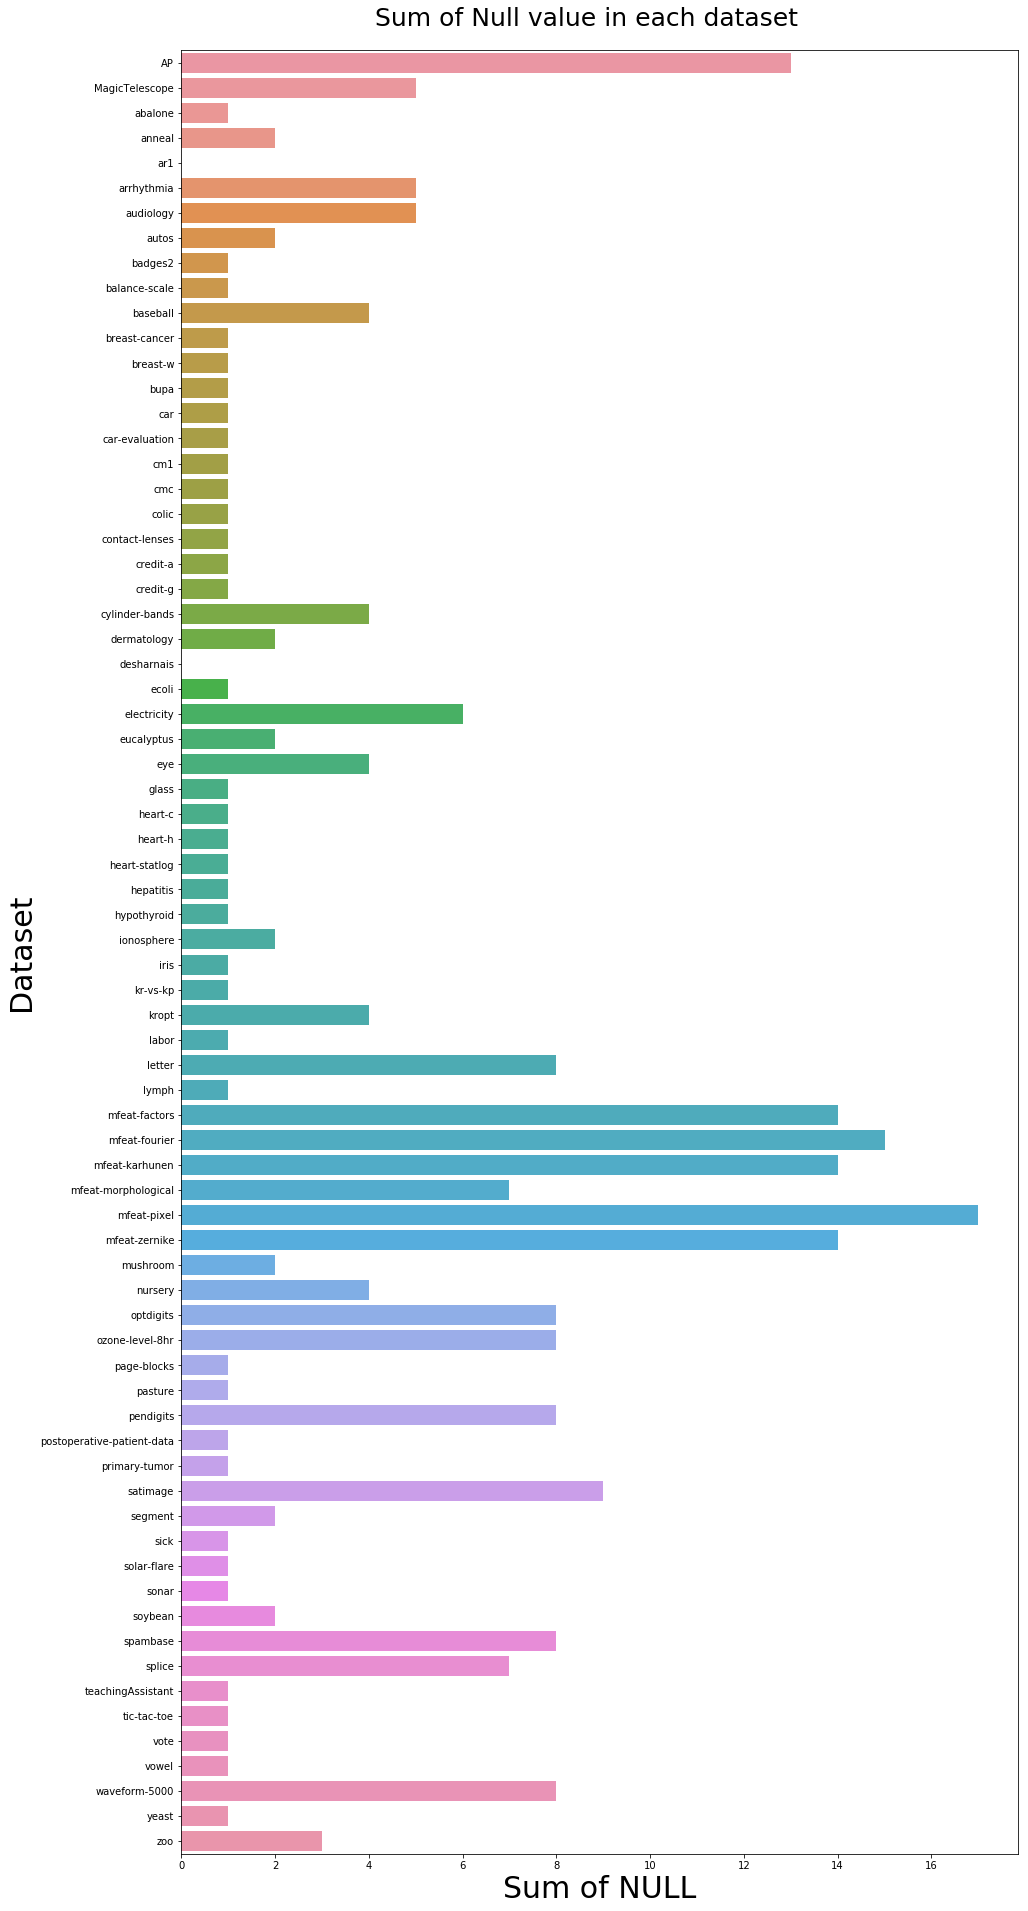

In [11]:
data_null = pd.DataFrame({'Datasets':data_null.index, 
                          'Sum of Null Values':data_null.values})
fig = plt.figure(figsize=(15,30))
title = fig.suptitle('Sum of Null value in each dataset', fontsize=25)
fig.subplots_adjust(top=0.96, wspace=0.3)
ax = sns.barplot(x='Sum of Null Values', y='Datasets', data=data_null)
ax.set_xlabel('Sum of NULL', fontsize=30)
ax.set_ylabel('Dataset', fontsize=30)

Most datasets have at least 1 value null ( 50% ), and the dataset 'mfeat-pixel' has 17 value null. This number isn't too big so we can accept the above analysis

# II. Analyze  each algorithm (rows)

 In this part, we also analyze the same method as part I but this time for each row

In [12]:
data_algo = data.drop(columns='Unnamed: 0').copy() # Prepare a new data
# Drop the colum id 0

In [13]:
data_algo.iloc[0,1:].astype('float64').describe()
# data_history.iloc[:,1]

count    72.000000
mean      0.840289
std       0.145253
min       0.451300
25%       0.739900
50%       0.884850
75%       0.961575
max       0.999100
Name: 0, dtype: float64

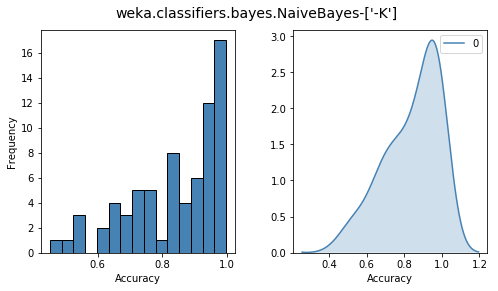

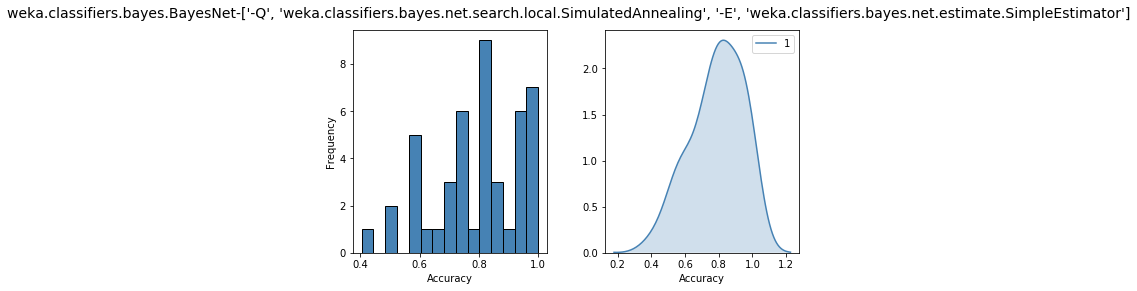

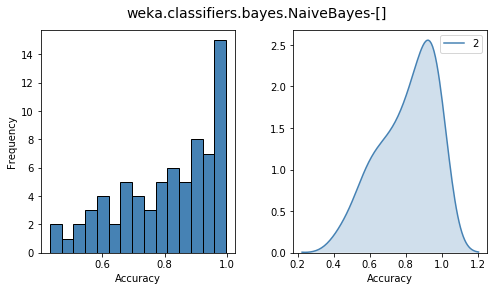

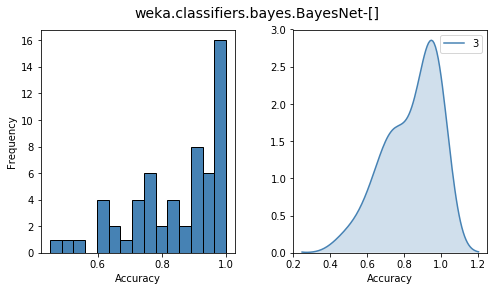

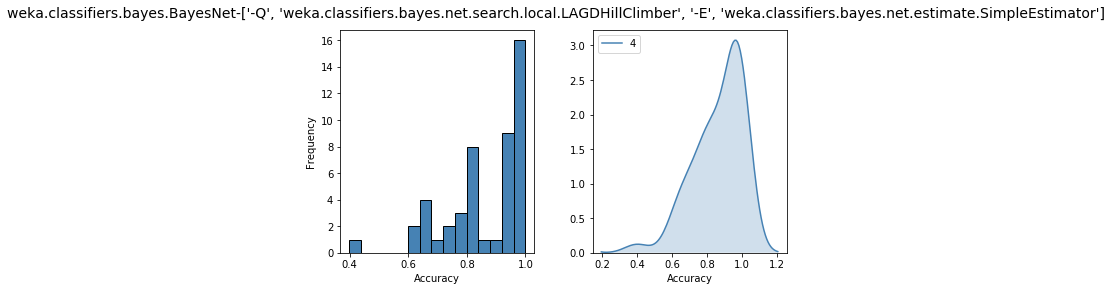

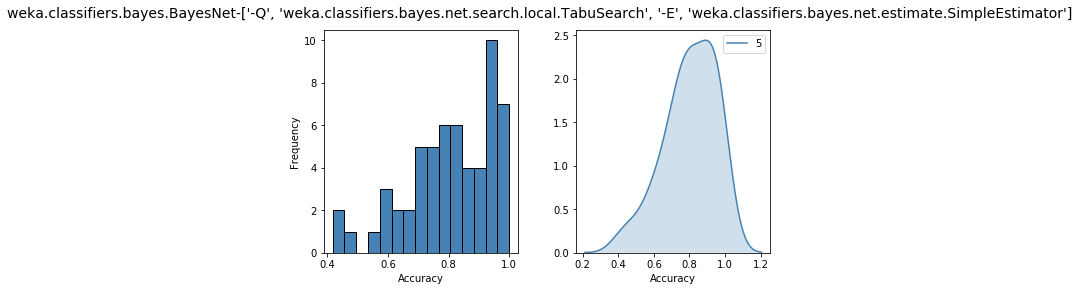

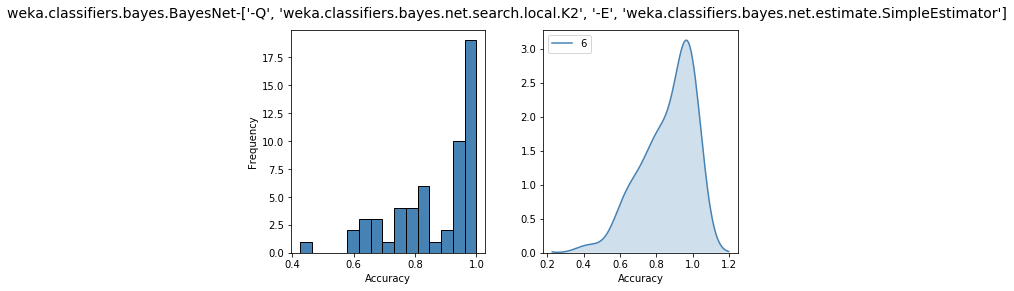

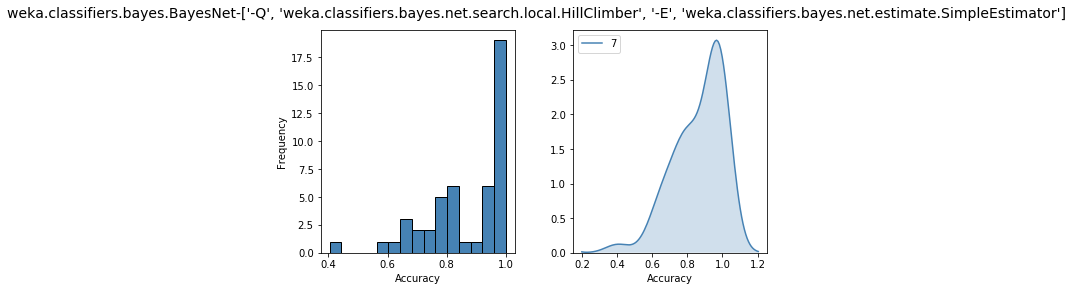

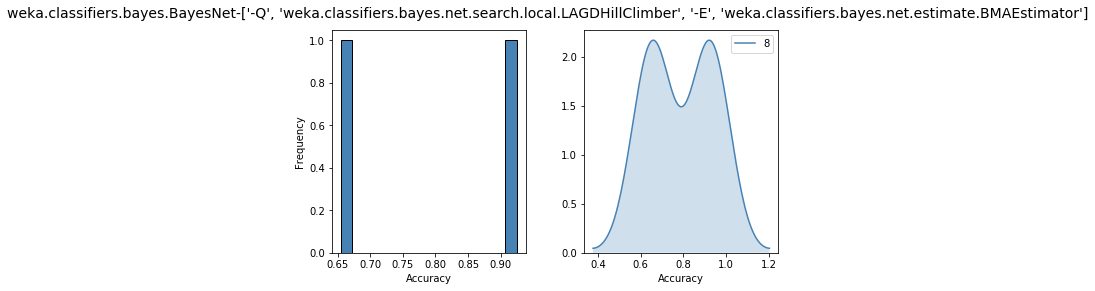

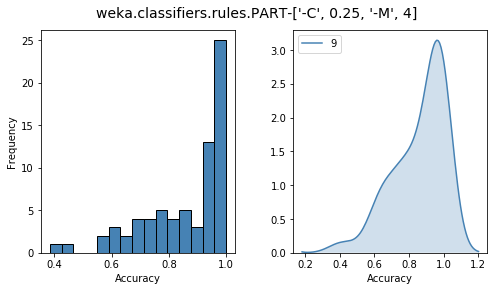

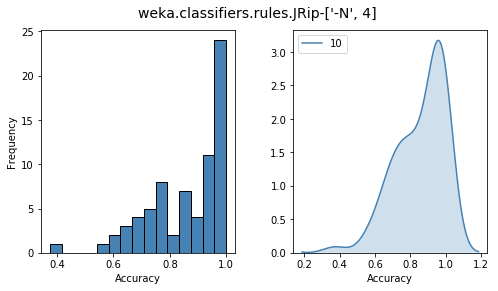

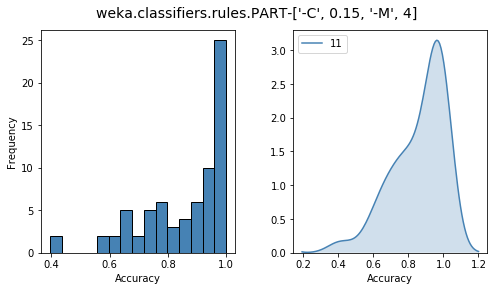

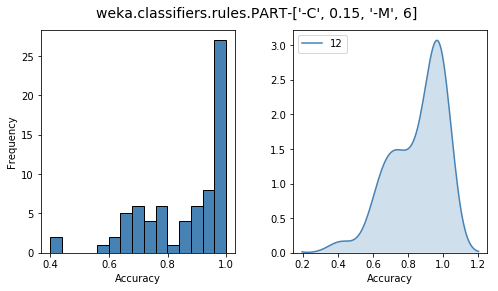

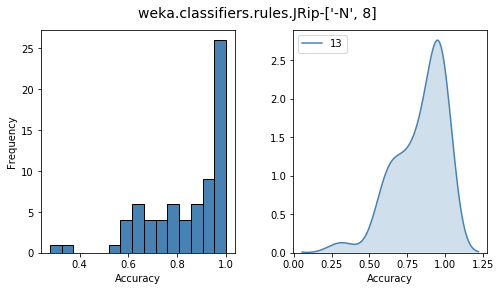

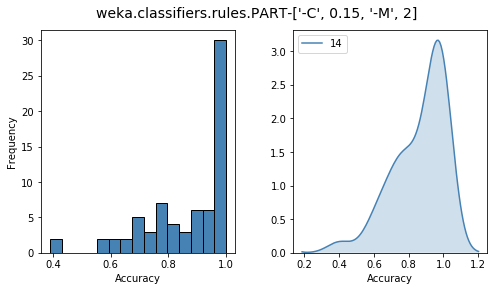

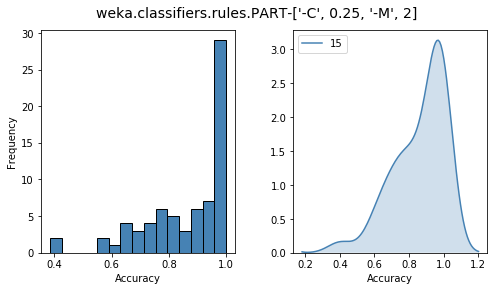

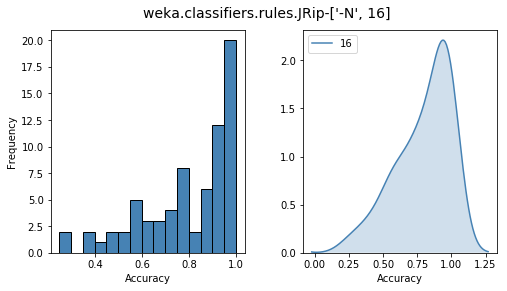

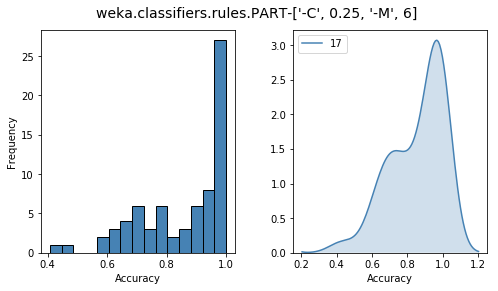

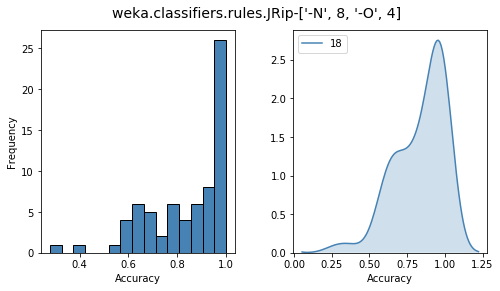

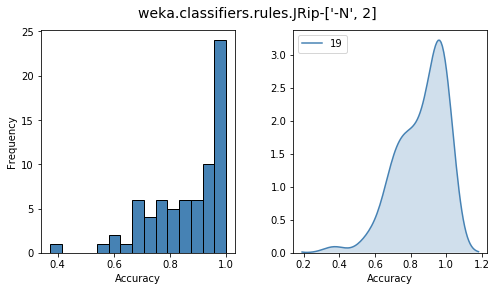

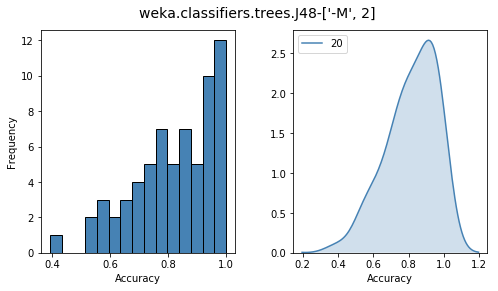

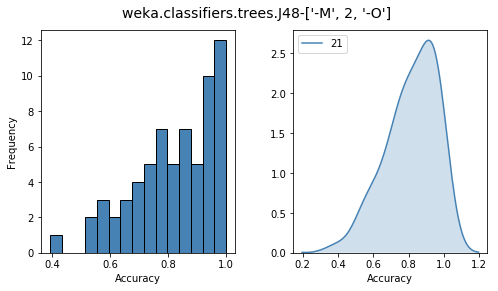

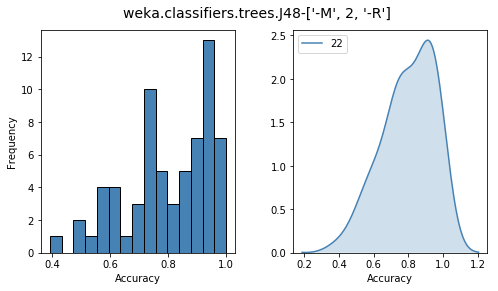

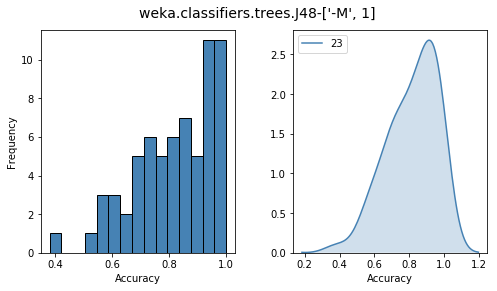

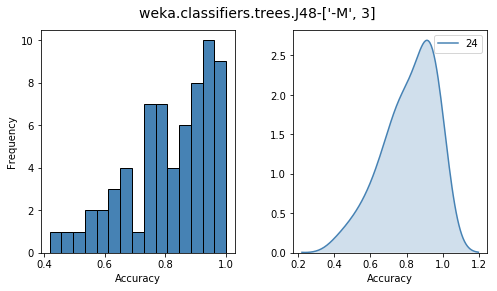

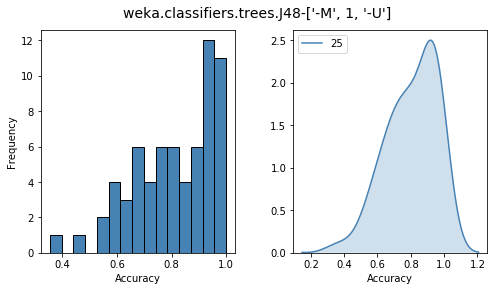

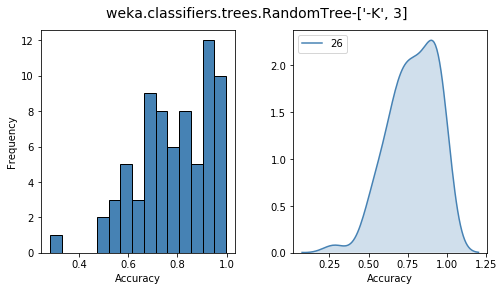

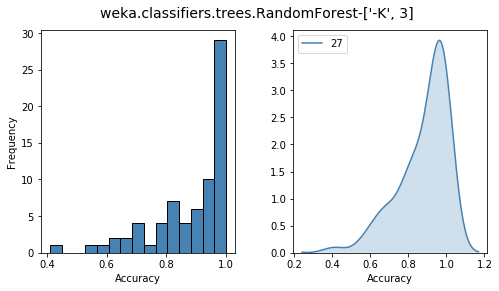

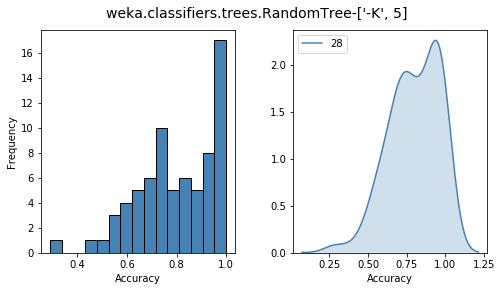

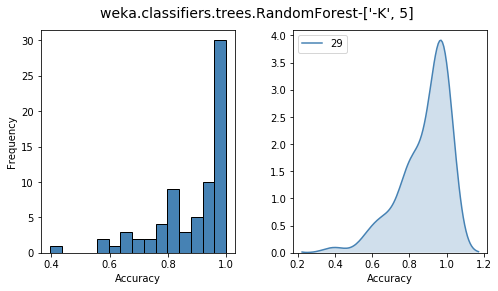

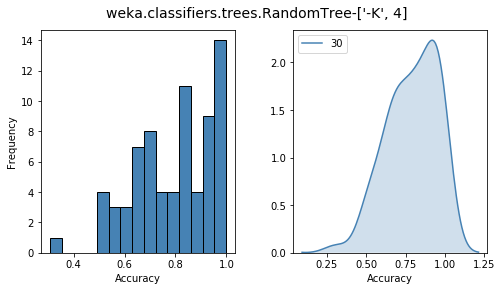

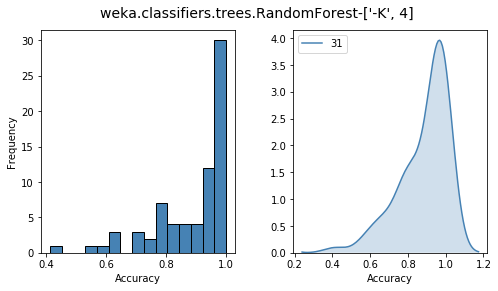

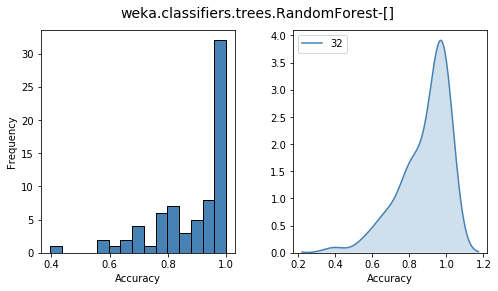

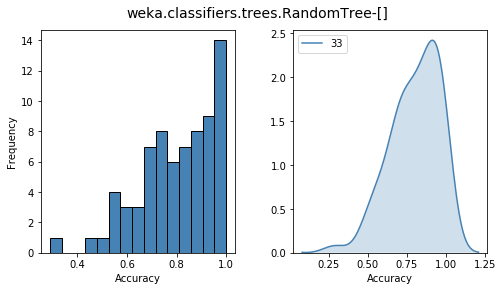

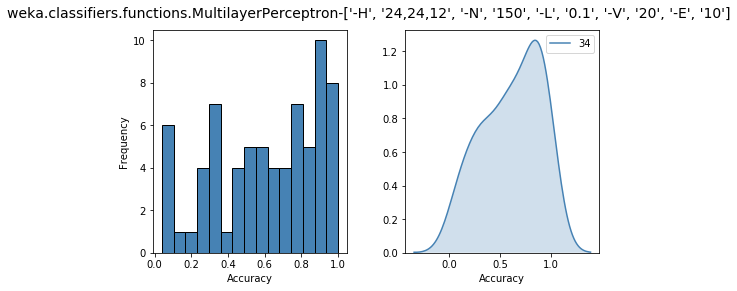

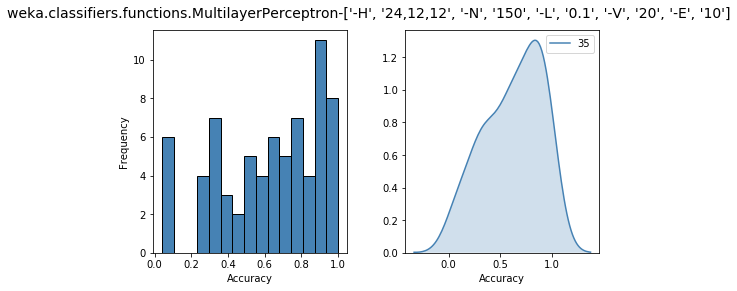

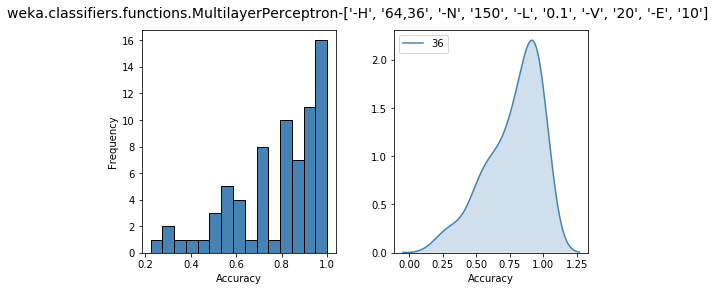

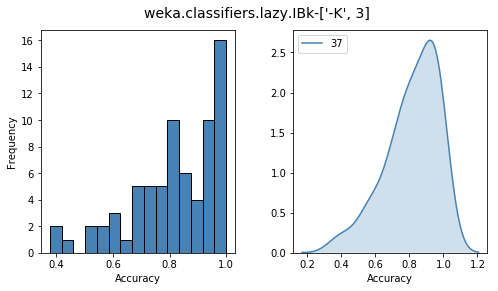

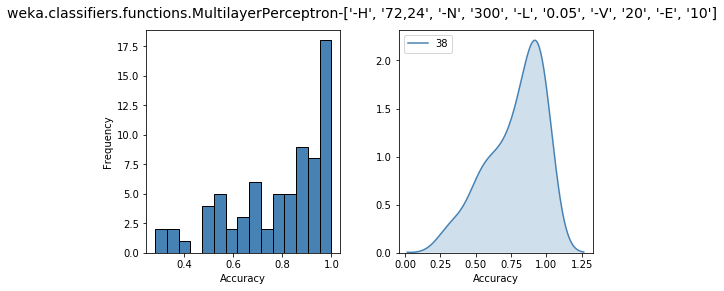

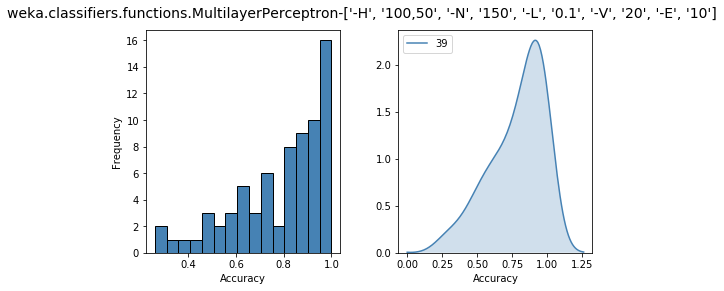

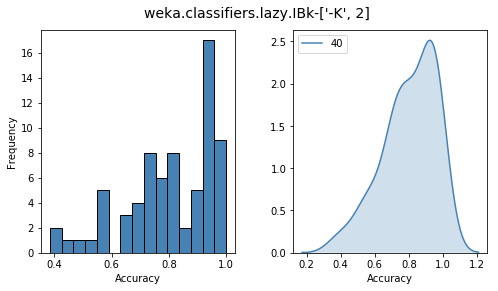

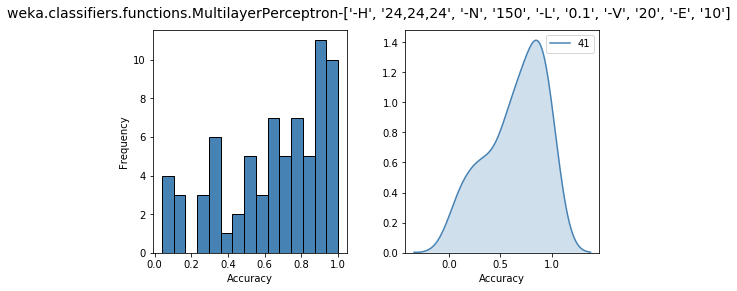

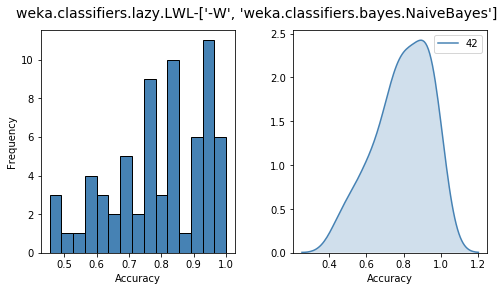

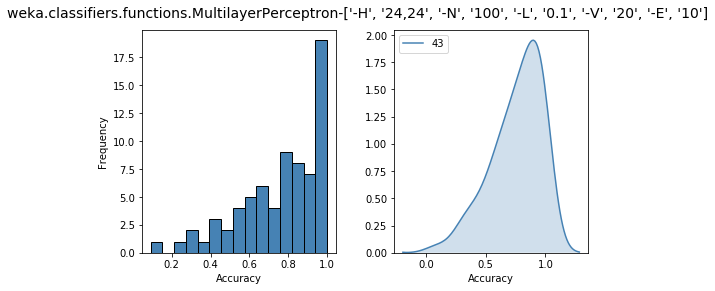

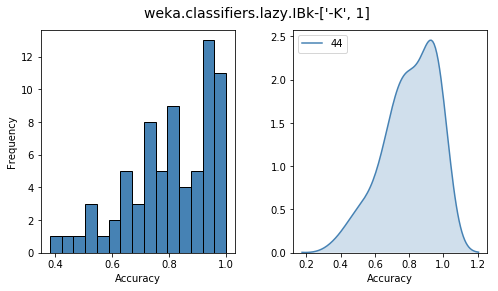

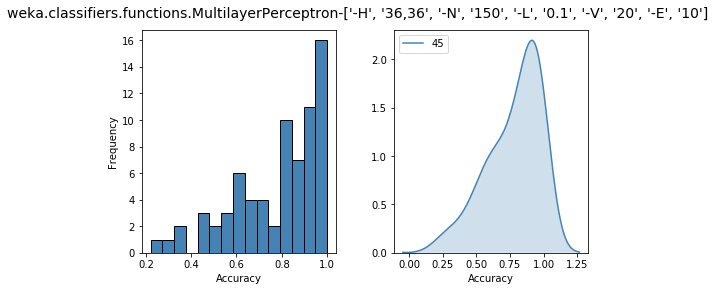

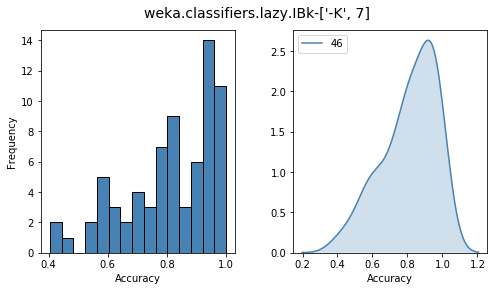

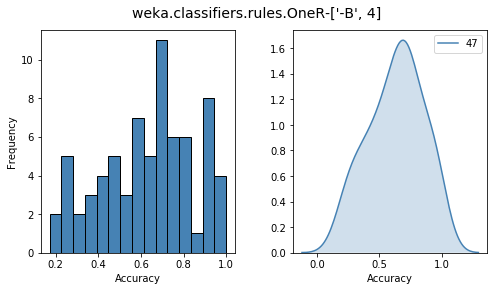

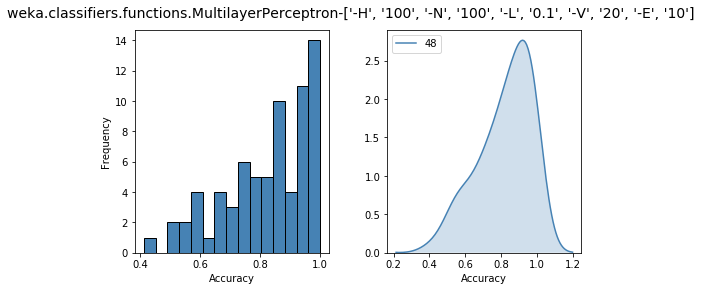

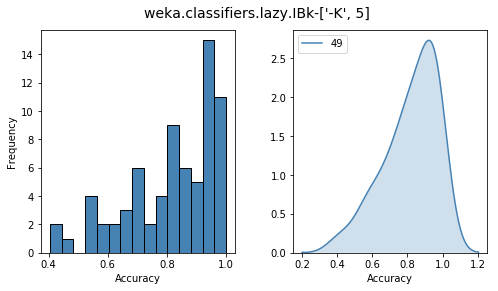

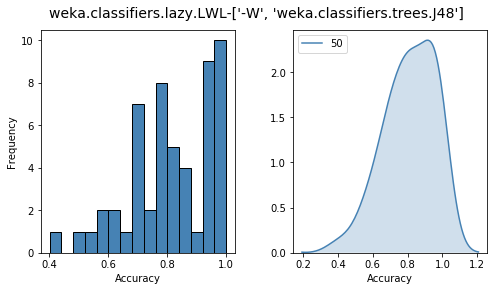

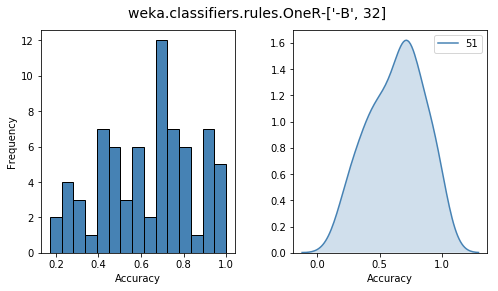

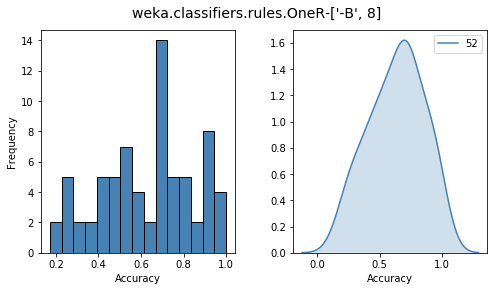

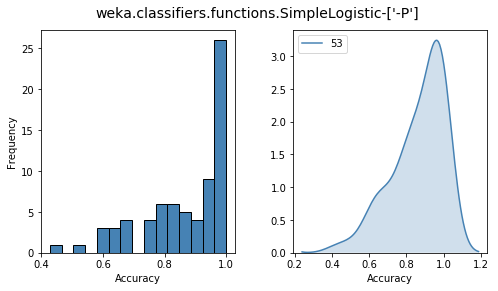

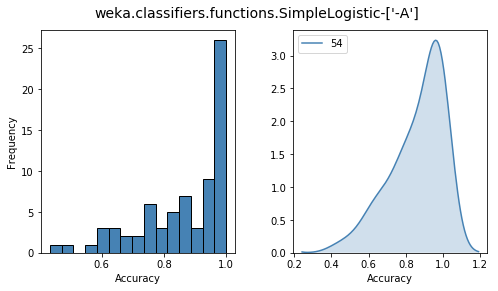

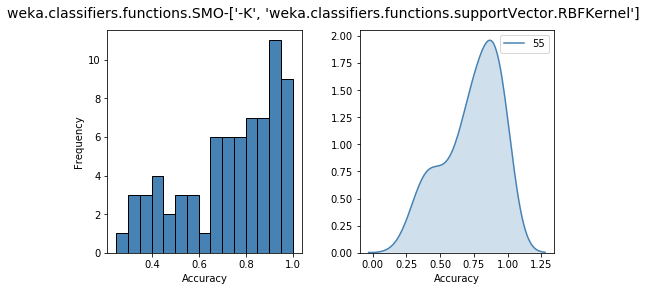

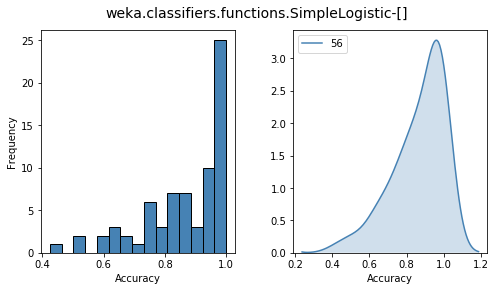

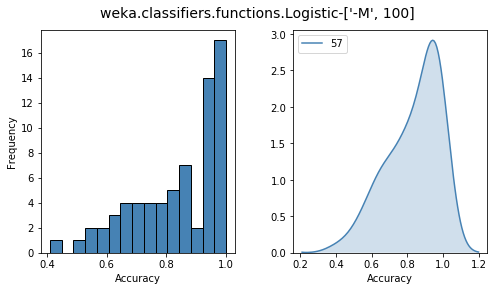

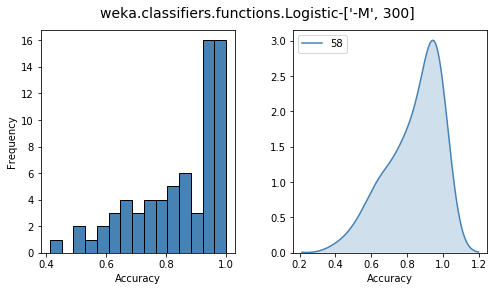

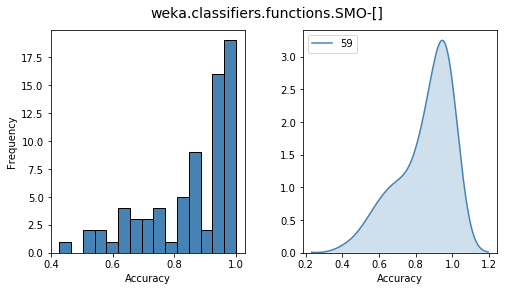

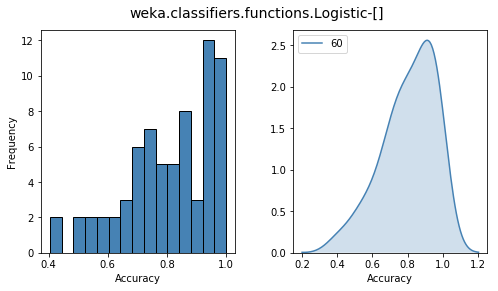

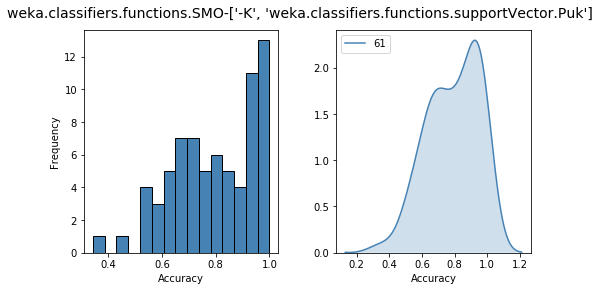

In [14]:
for i in range(62):
    # Histogram 
    
    fig = plt.figure(figsize=(8, 4))
    title = fig.suptitle( data_algo['clf name & configuration'][i], fontsize=14)
    fig.subplots_adjust(top=0.9, wspace=0.3)
    ax = fig.add_subplot(1,2,1)
    ax.set_xlabel('Accuracy')
    ax.set_ylabel('Frequency')
    freq, bins, patches = ax.hist(data_algo.iloc[i,1:].astype('float64'),
                                  color='steelblue', bins=15,
                                  edgecolor='black', linewidth=1 )
   
    # Density Plot

    fig.subplots_adjust(top=0.9, wspace=0.3)
    ax1 = fig.add_subplot(1,2,2)
    ax1.set_xlabel('Accuracy')
    sns.kdeplot(data_algo.iloc[i,1:].astype('float64'), 
                ax=ax1, shade=True, color='steelblue')


### Top 10 best algorithms

In [15]:
# add a new colum 'mean' in data_algo
data_algo['mean'] = data_algo.mean(axis=1).copy() 
data_algo.sort_values(by='mean', ascending = False).head(10)


,clf name & configuration,AP,MagicTelescope,abalone,anneal,ar1,arrhythmia,audiology,autos,badges2,...,spambase,splice,teachingAssistant,tic-tac-toe,vote,vowel,waveform-5000,yeast,zoo,mean
31,"weka.classifiers.trees.RandomForest-['-K', 4]",0.9402,0.9999,0.6902,0.8886,0.9008,0.6460,0.7788,0.8634,1.0,...,0.9972,0.9868,0.5629,1.000,0.9632,0.9758,0.8482,0.6442,0.9406,0.885219
32,weka.classifiers.trees.RandomForest-[],0.9573,0.9999,0.6902,0.9053,0.9008,0.6615,0.7920,0.8439,1.0,...,0.9993,0.9909,0.5629,1.000,0.9655,0.9758,0.8500,0.6442,0.9208,0.884717
29,"weka.classifiers.trees.RandomForest-['-K', 5]",0.9338,0.9999,0.6864,0.9053,0.9008,0.6527,0.7699,0.8439,1.0,...,0.9980,0.9931,0.5828,1.000,0.9655,0.9727,0.8510,0.6496,0.9208,0.884462
27,"weka.classifiers.trees.RandomForest-['-K', 3]",0.9231,0.9999,0.6895,0.8775,0.9008,0.6239,0.7965,0.8293,1.0,...,0.9950,0.9705,0.5629,1.000,0.9609,0.9798,0.8476,0.6516,0.9406,0.880458
56,weka.classifiers.functions.SimpleLogistic-[],0.9530,0.9999,0.6514,0.8797,0.9174,0.7434,0.8186,0.7366,1.0,...,0.9993,0.9987,0.5166,1.000,0.9678,0.8212,0.8688,0.5970,0.9208,0.865376
53,weka.classifiers.functions.SimpleLogistic-['-P'],0.9487,0.9999,0.6533,0.8842,0.9091,0.6748,0.8274,0.7463,1.0,...,0.9991,0.9994,0.5960,1.000,0.9747,0.8404,0.8662,0.5937,0.9109,0.865126
7,"weka.classifiers.bayes.BayesNet-['-Q', 'weka.c...",NaN,NaN,0.6761,0.9432,0.9256,NaN,NaN,0.7707,1.0,...,NaN,NaN,0.9272,0.999,0.9563,0.7828,NaN,0.6024,NaN,0.865083
4,"weka.classifiers.bayes.BayesNet-['-Q', 'weka.c...",NaN,NaN,0.6775,0.9432,0.9256,NaN,NaN,0.7854,1.0,...,NaN,NaN,0.9205,0.999,0.9563,0.8303,NaN,0.6024,NaN,0.864308
6,"weka.classifiers.bayes.BayesNet-['-Q', 'weka.c...",NaN,0.9999,0.6790,0.9265,0.9256,NaN,NaN,0.8293,1.0,...,NaN,NaN,0.8940,0.999,0.9517,0.7495,NaN,0.6004,0.9505,0.863352
14,"weka.classifiers.rules.PART-['-C', 0.15, '-M', 2]",0.9380,0.9999,0.6378,0.9087,0.9008,0.6504,0.7965,0.8146,1.0,...,0.9996,0.9994,0.4172,0.999,0.9609,0.7576,0.7816,0.5748,0.9109,0.862190


We try to review the algorithm id 31

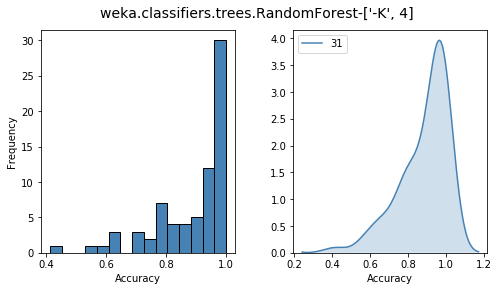

In [16]:

algorithm_best = data_algo.sort_values(by='mean', ascending = False).head(1)
algorithm_best.reset_index(drop=True)

fig = plt.figure(figsize=(8, 4))
title = fig.suptitle(algorithm_best.iloc[0,0], fontsize=14)
fig.subplots_adjust(top=0.9, wspace=0.3)
ax = fig.add_subplot(1,2,1)
ax.set_xlabel('Accuracy')
ax.set_ylabel('Frequency')
freq, bins, patches = ax.hist(algorithm_best.iloc[0,1:].astype('float64'),
                              color='steelblue', bins=15, 
                              edgecolor='black', linewidth=1 )
# Density Plot
fig.subplots_adjust(top=0.9, wspace=0.3)
ax1 = fig.add_subplot(1,2,2)
ax1.set_xlabel('Accuracy')
sns.kdeplot(algorithm_best.iloc[0,1:].astype('float64'), 
            ax=ax1, shade=True, color='steelblue')


This algorithm clearly give quite high accuracy score results for multiple datasets. And we'd like to review what these datasets in below analysis.

In [17]:
algorithm_best.iloc[0,1:].astype('float64').sort_values(ascending=False).head(10)

car-evaluation         1.0000
badges2                1.0000
heart-h                1.0000
tic-tac-toe            1.0000
mushroom               1.0000
MagicTelescope         0.9999
kropt                  0.9990
kr-vs-kp               0.9984
spambase               0.9972
mfeat-morphological    0.9960
Name: 31, dtype: float64

It includes 'car-evaluation', 'badges2', 'heart-h', 'tic-tac-toe', 'mushroom' ...

## Top 10 worst algorithm

In [18]:
algorithm_worst = data_algo.sort_values(by='mean', ascending = True)
algorithm_worst.reset_index(drop=True).head(10)

,clf name & configuration,AP,MagicTelescope,abalone,anneal,ar1,arrhythmia,audiology,autos,badges2,...,spambase,splice,teachingAssistant,tic-tac-toe,vote,vowel,waveform-5000,yeast,zoo,mean
0,weka.classifiers.functions.MultilayerPerceptro...,0.9017,0.8644,0.6586,0.7617,0.9256,0.5420,0.2522,0.3268,1.0,...,0.8142,0.7172,0.3245,0.9144,0.8943,0.0909,0.8600,0.3032,0.4059,0.611131
1,weka.classifiers.functions.MultilayerPerceptro...,0.9017,0.8645,0.6565,0.7617,0.9256,0.5420,0.2522,0.3268,1.0,...,0.8792,0.7028,0.3245,0.9165,0.8943,0.0909,0.8614,0.3032,0.4059,0.623119
2,"weka.classifiers.rules.OneR-['-B', 4]",0.9380,0.7011,0.5360,0.7962,0.9008,0.5774,0.4646,0.6537,1.0,...,0.7814,0.2436,0.4106,0.6994,0.9517,0.3242,0.5132,0.3989,0.4257,0.631311
3,"weka.classifiers.rules.OneR-['-B', 32]",0.9081,0.7344,0.5942,0.7984,0.9008,0.5973,0.4646,0.5024,1.0,...,0.7824,0.2436,0.4106,0.6994,0.9517,0.3121,0.5522,0.3989,0.4257,0.632349
4,"weka.classifiers.rules.OneR-['-B', 8]",0.9380,0.7160,0.5976,0.7984,0.9008,0.5774,0.4646,0.5463,1.0,...,0.7877,0.2436,0.4106,0.6994,0.9517,0.3172,0.5446,0.4036,0.4257,0.633414
5,weka.classifiers.functions.MultilayerPerceptro...,0.9124,0.8636,0.6591,0.7684,0.9256,0.5420,0.2522,0.3268,1.0,...,0.8815,0.7129,0.3311,0.9154,0.8943,0.0909,0.8598,0.3053,0.4059,0.647819
6,"weka.classifiers.functions.SMO-['-K', 'weka.cl...",0.8932,0.7797,0.5365,0.7617,0.9256,0.5420,0.4115,0.4341,1.0,...,0.7307,0.9611,0.3444,0.7296,0.9425,0.3394,0.8506,0.3120,0.6733,0.733497
7,weka.classifiers.functions.MultilayerPerceptro...,0.9573,0.8623,0.6526,0.7895,0.9256,0.5619,0.4469,0.4146,1.0,...,0.8809,0.7796,0.3311,0.9843,0.9724,0.0909,0.8620,0.4178,0.5743,0.758228
8,weka.classifiers.functions.MultilayerPerceptro...,0.9530,0.8629,0.6634,0.7984,0.9256,0.5597,0.5044,0.4780,1.0,...,0.8839,0.9097,0.3642,0.9875,0.9655,0.2212,0.8634,0.4730,0.5941,0.778429
9,weka.classifiers.functions.MultilayerPerceptro...,0.9615,0.8631,0.6596,0.8018,0.9256,0.5619,0.5221,0.4634,1.0,...,0.8837,0.9414,0.3510,0.9791,0.9655,0.2232,0.8564,0.5101,0.6139,0.779356


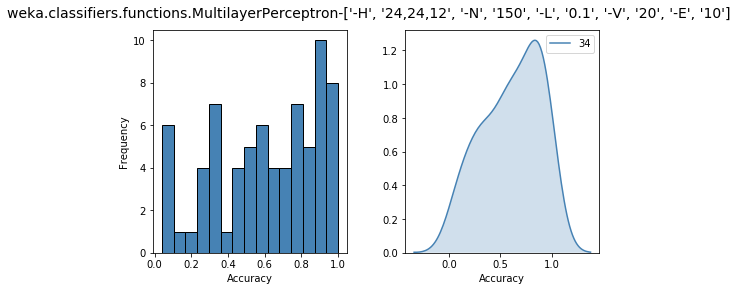

In [19]:
fig = plt.figure(figsize=(8, 4))
title = fig.suptitle(algorithm_worst.iloc[0,0], fontsize=14)
fig.subplots_adjust(top=0.9, wspace=0.3)
ax = fig.add_subplot(1,2,1)
ax.set_xlabel('Accuracy')
ax.set_ylabel('Frequency')
freq, bins, patches = ax.hist(algorithm_worst.iloc[0,1:].astype('float64'), 
                              color='steelblue', bins=15, 
                              edgecolor='black', linewidth=1 )
# Density Plot
fig.subplots_adjust(top=0.9, wspace=0.3)
ax1 = fig.add_subplot(1,2,2)
ax1.set_xlabel('Accuracy')
sns.kdeplot(algorithm_worst.iloc[0,1:].astype('float64'),
            ax=ax1, shade=True, color='steelblue')


In [20]:
algorithm_worst.iloc[0,1:].astype('float64').sort_values(ascending=True).head(10)

letter                 0.0394
vowel                  0.0909
mfeat-zernike          0.1000
mfeat-fourier          0.1000
mfeat-morphological    0.1000
mfeat-karhunen         0.1000
mfeat-factors          0.1460
soybean                0.1947
primary-tumor          0.2478
audiology              0.2522
Name: 34, dtype: float64

The average accuracy result is about 0.6, the dataset 'letter' has too bad accuracy result (0.0394). Clearly, this is a bad algorithm.

# III. Analyze each parameter for each algorithm

For each algorithm, we have the corresponding parameter. We'll analyze it and at the end of this part, we will summarize it.

## 1. Bayes

In [21]:
# Analysis for each algorithms with each parametre 
# Example: weka.classifiers.bayes.BayesNet
BayesNet = data_algo[data_algo['clf name & configuration']
                     .str.contains('^weka.classifiers.bayes.BayesNet-*')].copy()

In [22]:
#reduce the name of algorith
BayesNet['clf name & configuration'] = BayesNet['clf name & configuration'].str.replace('^w.*Net-',
                                                                                        '', regex=True) 
BayesNet

,clf name & configuration,AP,MagicTelescope,abalone,anneal,ar1,arrhythmia,audiology,autos,badges2,...,spambase,splice,teachingAssistant,tic-tac-toe,vote,vowel,waveform-5000,yeast,zoo,mean
1,"['-Q', 'weka.classifiers.bayes.net.search.loca...",NaN,0.8395,0.5688,NaN,0.9256,NaN,NaN,NaN,1.0,...,NaN,NaN,0.5166,0.9019,0.9655,0.7374,NaN,0.5761,0.9505,0.789211
3,[],NaN,0.9984,0.6299,0.9131,0.9256,0.7168,0.7478,0.7073,1.0,...,NaN,NaN,0.9073,0.9990,0.9011,0.6253,NaN,0.6004,0.9307,0.840755
4,"['-Q', 'weka.classifiers.bayes.net.search.loca...",NaN,NaN,0.6775,0.9432,0.9256,NaN,NaN,0.7854,1.0,...,NaN,NaN,0.9205,0.9990,0.9563,0.8303,NaN,0.6024,NaN,0.864308
5,"['-Q', 'weka.classifiers.bayes.net.search.loca...",NaN,0.8363,0.6368,0.9232,0.9256,0.7102,0.7655,0.7854,1.0,...,NaN,NaN,0.4172,0.7704,0.9517,0.7747,NaN,0.5755,0.9406,0.803003
6,"['-Q', 'weka.classifiers.bayes.net.search.loca...",NaN,0.9999,0.6790,0.9265,0.9256,NaN,NaN,0.8293,1.0,...,NaN,NaN,0.8940,0.9990,0.9517,0.7495,NaN,0.6004,0.9505,0.863352
7,"['-Q', 'weka.classifiers.bayes.net.search.loca...",NaN,NaN,0.6761,0.9432,0.9256,NaN,NaN,0.7707,1.0,...,NaN,NaN,0.9272,0.9990,0.9563,0.7828,NaN,0.6024,NaN,0.865083
8,"['-Q', 'weka.classifiers.bayes.net.search.loca...",NaN,NaN,NaN,NaN,0.9256,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.789950


Text(0, 0.5, 'Parametre')

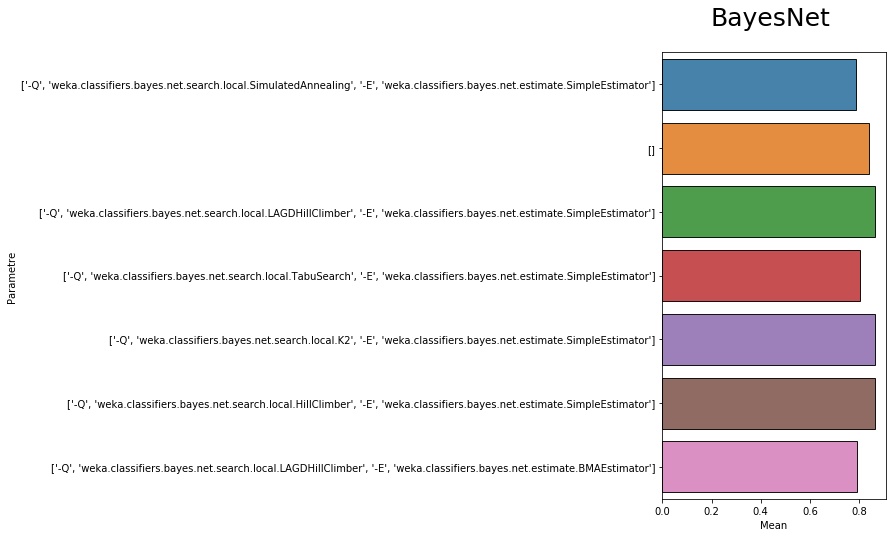

In [23]:
fig = plt.figure(figsize=(4,8))
title = fig.suptitle('BayesNet', fontsize=25)
fig.subplots_adjust(top=0.9, wspace=0.3)
ax = sns.barplot(x='mean', y='clf name & configuration', 
                 data=BayesNet, alpha=0.9, edgecolor='black')
ax.set_xlabel('Mean')
ax.set_ylabel('Parametre')

In [24]:
BayesNet.mean(axis=1)

1    0.789211
3    0.840755
4    0.864308
5    0.803003
6    0.863352
7    0.865083
8    0.789950
dtype: float64

In [25]:
BayesNet.mean(axis=1).idxmax()

7

## 2. Naive Bayers

In [26]:
NaiveBayers = data_algo[data_algo['clf name & configuration']
                        .str.contains('^weka.classifiers.bayes.NaiveBayes-*')].copy()

In [27]:
NaiveBayers['clf name & configuration'] = NaiveBayers['clf name & configuration'].str.replace('^w.*Bayes-',
                                                                                              '', regex=True)
NaiveBayers

,clf name & configuration,AP,MagicTelescope,abalone,anneal,ar1,arrhythmia,audiology,autos,badges2,...,spambase,splice,teachingAssistant,tic-tac-toe,vote,vowel,waveform-5000,yeast,zoo,mean
0,['-K'],0.9615,0.9967,0.6253,0.8608,0.8843,0.6504,0.7168,0.6780,0.9932,...,0.9854,0.9991,0.5497,0.9958,0.9011,0.6909,0.8012,0.6098,0.9604,0.840289
2,[],0.9594,0.8944,0.5808,0.6882,0.8595,0.6173,0.7168,0.6098,0.9966,...,0.8133,0.9925,0.5298,0.9916,0.9011,0.6303,0.7998,0.5856,0.9406,0.809447


Text(0, 0.5, 'Parametre')

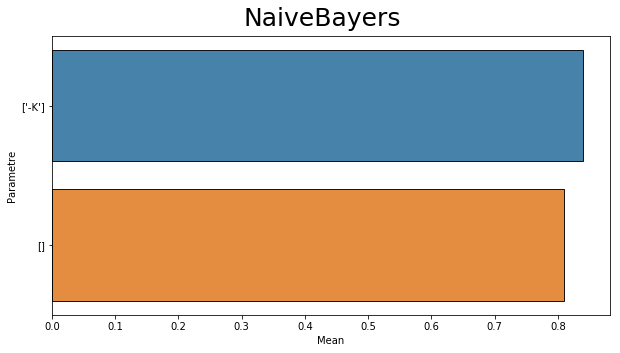

In [28]:
fig = plt.figure(figsize=(10,5))
title = fig.suptitle('NaiveBayers', fontsize=25)
fig.subplots_adjust(top=0.9, wspace=0.3)
ax = sns.barplot(x='mean', y='clf name & configuration', 
                 data=NaiveBayers, alpha=0.9, edgecolor='black')
ax.set_xlabel('Mean')
ax.set_ylabel('Parametre')

In [29]:
NaiveBayers.mean(axis=1)

0    0.840289
2    0.809447
dtype: float64

In [30]:
NaiveBayers.mean(axis=1).idxmax()

0

## 3.  Rule Parts

In [31]:
RuleParts = data_algo[data_algo['clf name & configuration']
                      .str.contains('^weka.classifiers.rules.PART-*')].copy()

In [32]:
RuleParts['clf name & configuration'] = RuleParts['clf name & configuration'].str.replace('^w.*PART-',
                                                                                          '', regex=True)

In [33]:
RuleParts

,clf name & configuration,AP,MagicTelescope,abalone,anneal,ar1,arrhythmia,audiology,autos,badges2,...,spambase,splice,teachingAssistant,tic-tac-toe,vote,vowel,waveform-5000,yeast,zoo,mean
9,"['-C', 0.25, '-M', 4]",0.9338,0.9999,0.6445,0.9076,0.9256,0.6283,0.7611,0.6488,1.0,...,0.9996,0.9994,0.4437,0.999,0.9563,0.7404,0.7812,0.5654,0.8812,0.859849
11,"['-C', 0.15, '-M', 4]",0.9338,0.9999,0.6519,0.9065,0.9339,0.6261,0.7522,0.6585,1.0,...,0.9996,0.9994,0.4305,0.999,0.9586,0.7444,0.7772,0.5654,0.8812,0.860604
12,"['-C', 0.15, '-M', 6]",0.9316,0.9999,0.6459,0.8931,0.9174,0.6549,0.6814,0.6439,1.0,...,0.9996,0.9994,0.4371,0.999,0.9632,0.6889,0.7812,0.5836,0.9010,0.855542
14,"['-C', 0.15, '-M', 2]",0.9380,0.9999,0.6378,0.9087,0.9008,0.6504,0.7965,0.8146,1.0,...,0.9996,0.9994,0.4172,0.999,0.9609,0.7576,0.7816,0.5748,0.9109,0.862190
15,"['-C', 0.25, '-M', 2]",0.9380,0.9999,0.6325,0.9053,0.8843,0.6504,0.8009,0.8146,1.0,...,0.9996,0.9994,0.4238,0.999,0.9609,0.7535,0.7816,0.5721,0.9109,0.861097
17,"['-C', 0.25, '-M', 6]",0.9316,0.9999,0.6457,0.8864,0.9174,0.6726,0.6814,0.6244,1.0,...,0.9996,0.9994,0.4570,0.999,0.9632,0.6838,0.7790,0.5809,0.9010,0.855272


Text(0, 0.5, 'Parametre')

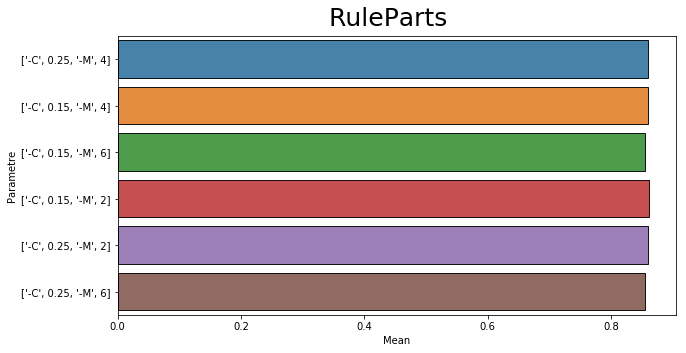

In [34]:
fig = plt.figure(figsize=(10,5))
title = fig.suptitle('RuleParts', fontsize=25)
fig.subplots_adjust(top=0.9, wspace=0.3)
ax = sns.barplot(x='mean', y='clf name & configuration',
                 data=RuleParts, alpha=0.9, edgecolor='black')
ax.set_xlabel('Mean')
ax.set_ylabel('Parametre')

In [35]:
RuleParts.mean(axis=1)

9     0.859849
11    0.860604
12    0.855542
14    0.862190
15    0.861097
17    0.855272
dtype: float64

In [36]:
RuleParts.mean(axis=1).idxmax()

14

## 4.  Rules Jrip

In [37]:
RuleJrip = data_algo[data_algo['clf name & configuration']
                     .str.contains('^weka.classifiers.rules.JRip-*')].copy()

In [38]:
RuleJrip['clf name & configuration'] = RuleJrip['clf name & configuration'].str.replace('^w.*JRip-',
                                                                                        '', regex=True)

In [39]:
RuleJrip

,clf name & configuration,AP,MagicTelescope,abalone,anneal,ar1,arrhythmia,audiology,autos,badges2,...,spambase,splice,teachingAssistant,tic-tac-toe,vote,vowel,waveform-5000,yeast,zoo,mean
10,"['-N', 4]",0.9338,0.9999,0.6608,0.8909,0.9256,0.7124,0.6726,0.6976,1.0,...,0.9996,0.9991,0.7748,0.999,0.9540,0.6869,0.7894,0.6078,0.8713,0.857632
13,"['-N', 8]",0.9402,0.9999,0.6517,0.8831,0.9256,0.6637,0.5973,0.6585,1.0,...,0.9996,0.9991,0.6291,0.999,0.9540,0.6232,0.7944,0.5863,0.6238,0.836340
16,"['-N', 16]",0.9274,0.9999,0.6474,0.8207,0.9256,0.5996,0.3938,0.4683,1.0,...,0.9996,0.9991,0.3709,0.999,0.9517,0.4859,0.7954,0.5741,0.4059,0.795526
18,"['-N', 8, '-O', 4]",NaN,0.9999,0.6569,0.8964,0.9256,0.6814,0.5708,0.6732,1.0,...,0.9996,0.9991,0.6424,0.999,0.9540,0.6404,0.8026,0.5930,0.6238,0.837333
19,"['-N', 2]",0.9209,0.9999,0.6608,0.8942,0.9008,0.7035,0.7301,0.6976,1.0,...,0.9996,0.9991,0.8411,0.999,0.9517,0.6848,0.7894,0.6132,0.8713,0.861247


Text(0, 0.5, 'Parametre')

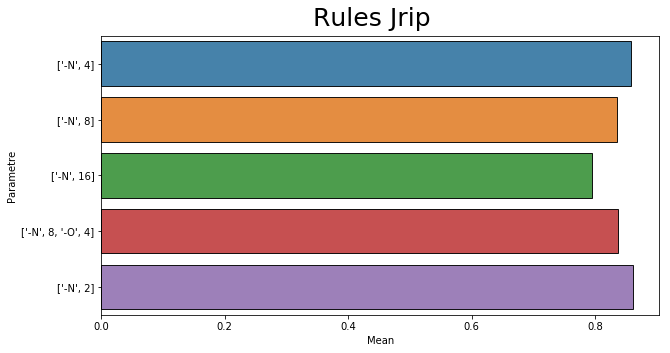

In [40]:
fig = plt.figure(figsize=(10,5))
title = fig.suptitle('Rules Jrip', fontsize=25)
fig.subplots_adjust(top=0.9, wspace=0.3)
ax = sns.barplot(x='mean', y='clf name & configuration',
                 data=RuleJrip, alpha=0.9, edgecolor='black')
ax.set_xlabel('Mean')
ax.set_ylabel('Parametre')

In [41]:
RuleJrip.mean(axis=1)

10    0.857632
13    0.836340
16    0.795526
18    0.837333
19    0.861247
dtype: float64

In [42]:
RuleJrip.mean(axis=1).idxmax()

19

## 5. Trees J48

In [43]:
TreesJ48 = data_algo[data_algo['clf name & configuration']
                     .str.contains('^weka.classifiers.trees.J48-*')].copy()

In [44]:
TreesJ48['clf name & configuration'] = TreesJ48['clf name & configuration'].str.replace('^w.*J48-',
                                                                                        '', regex=True)
TreesJ48

,clf name & configuration,AP,MagicTelescope,abalone,anneal,ar1,arrhythmia,audiology,autos,badges2,...,spambase,splice,teachingAssistant,tic-tac-toe,vote,vowel,waveform-5000,yeast,zoo,mean
20,"['-M', 2]",0.9338,0.8511,0.6090,0.9265,0.8843,0.6681,0.7876,0.8146,1.0,...,0.9261,0.9420,0.5364,0.8424,0.9655,0.7758,0.7580,0.5546,0.9208,0.816474
21,"['-M', 2, '-O']",0.9338,0.8511,0.6090,0.9265,0.8843,0.6681,0.7876,0.8146,1.0,...,0.9261,0.9420,0.5364,0.8424,0.9655,0.7758,0.7580,0.5546,0.9208,0.816474
22,"['-M', 2, '-R']",0.9252,0.8484,0.6335,0.9076,0.9256,0.6770,0.7301,0.6341,1.0,...,0.9235,0.9348,0.4901,0.8372,0.9563,0.7263,0.7678,0.5714,0.8812,0.800814
23,"['-M', 1]",0.9338,0.8513,0.6067,0.9243,0.8760,0.6482,0.8274,0.8195,1.0,...,0.9294,0.9364,0.5894,0.8591,0.9678,0.7919,0.7578,0.5512,0.9208,0.816345
24,"['-M', 3]",0.9316,0.8514,0.6122,0.9198,0.9008,0.6504,0.7832,0.7415,1.0,...,0.9268,0.9423,0.4636,0.8330,0.9655,0.7556,0.7616,0.5465,0.9208,0.814794
25,"['-M', 1, '-U']",0.9338,0.8499,0.5959,0.9165,0.8843,0.6372,0.8186,0.8537,1.0,...,0.9250,0.9160,0.6623,0.8737,0.9609,0.8283,0.7568,0.5357,0.9406,0.806527


Text(0, 0.5, 'Parametre')

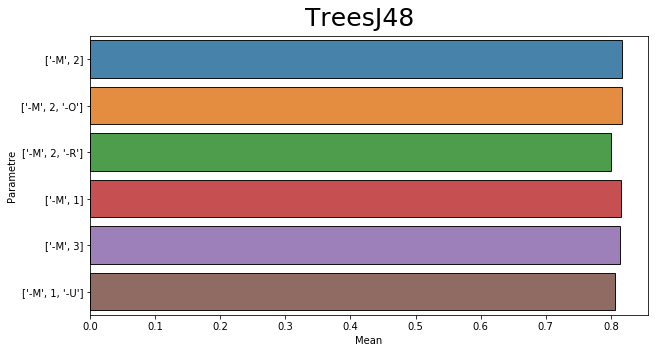

In [45]:
fig = plt.figure(figsize=(10,5))
title = fig.suptitle('TreesJ48', fontsize=25)
fig.subplots_adjust(top=0.9, wspace=0.3)
ax = sns.barplot(x='mean', y='clf name & configuration',
                 data=TreesJ48, alpha=0.9, edgecolor='black')
ax.set_xlabel('Mean')
ax.set_ylabel('Parametre')

In [46]:
TreesJ48.mean(axis=1)

20    0.816474
21    0.816474
22    0.800814
23    0.816345
24    0.814794
25    0.806527
dtype: float64

In [47]:
TreesJ48.mean(axis=1).idxmax()

20

## 6. Random Tree

In [48]:
RandomTree = data_algo[data_algo['clf name & configuration']
                       .str.contains('^weka.classifiers.trees.RandomTree-*')].copy()

In [49]:
RandomTree['clf name & configuration'] = RandomTree['clf name & configuration'].str.replace('^w.*RandomTree-',
                                                                                            '', regex=True)
RandomTree

,clf name & configuration,AP,MagicTelescope,abalone,anneal,ar1,arrhythmia,audiology,autos,badges2,...,spambase,splice,teachingAssistant,tic-tac-toe,vote,vowel,waveform-5000,yeast,zoo,mean
26,"['-K', 3]",0.8013,0.9976,0.5901,0.7773,0.8760,0.4867,0.5929,0.7561,0.9694,...,0.9591,0.6871,0.5298,0.9342,0.9172,0.7929,0.6876,0.5290,0.7525,0.785368
28,"['-K', 5]",0.8077,0.9982,0.5961,0.8107,0.9008,0.4403,0.5398,0.7268,0.9932,...,0.9613,0.7420,0.5762,0.9948,0.9494,0.7970,0.7064,0.5256,0.6436,0.800100
30,"['-K', 4]",0.8226,0.9985,0.6016,0.8185,0.8595,0.5000,0.5088,0.7610,0.9932,...,0.9672,0.6981,0.5430,0.9885,0.9287,0.8000,0.7118,0.5007,0.6436,0.791612
33,[],0.8397,0.9985,0.6016,0.8374,0.9008,0.4779,0.5973,0.7268,0.9932,...,0.9583,0.7859,0.5298,0.9885,0.9494,0.8000,0.7260,0.5007,0.6436,0.802317


Text(0, 0.5, 'Parametre')

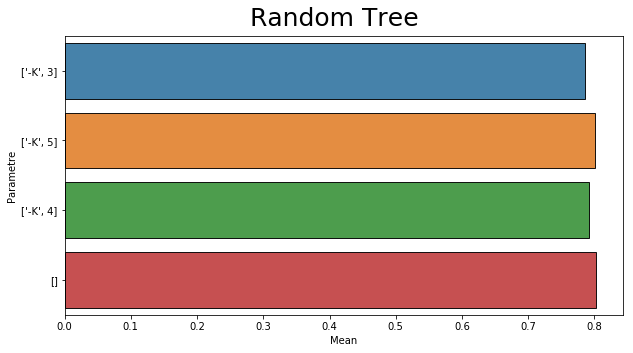

In [50]:
fig = plt.figure(figsize=(10,5))
title = fig.suptitle('Random Tree', fontsize=25)
fig.subplots_adjust(top=0.9, wspace=0.3)
ax = sns.barplot(x='mean', y='clf name & configuration', 
                 data=RandomTree, alpha=0.9, edgecolor='black')
ax.set_xlabel('Mean')
ax.set_ylabel('Parametre')

In [51]:
RandomTree.mean(axis=1)

26    0.785368
28    0.800100
30    0.791612
33    0.802317
dtype: float64

In [52]:
RandomTree.mean(axis=1).idxmax()

33

## 7. Random Forest

In [53]:
RandomForest = data_algo[data_algo['clf name & configuration']
                         .str.contains('^weka.classifiers.trees.RandomForest-*')].copy()

In [54]:
RandomForest['clf name & configuration'] = RandomForest['clf name & configuration'].str.replace('^w.*RandomForest-',
                                                                                                '', regex=True)
RandomForest

,clf name & configuration,AP,MagicTelescope,abalone,anneal,ar1,arrhythmia,audiology,autos,badges2,...,spambase,splice,teachingAssistant,tic-tac-toe,vote,vowel,waveform-5000,yeast,zoo,mean
27,"['-K', 3]",0.9231,0.9999,0.6895,0.8775,0.9008,0.6239,0.7965,0.8293,1.0,...,0.9950,0.9705,0.5629,1.0,0.9609,0.9798,0.8476,0.6516,0.9406,0.880458
29,"['-K', 5]",0.9338,0.9999,0.6864,0.9053,0.9008,0.6527,0.7699,0.8439,1.0,...,0.9980,0.9931,0.5828,1.0,0.9655,0.9727,0.8510,0.6496,0.9208,0.884462
31,"['-K', 4]",0.9402,0.9999,0.6902,0.8886,0.9008,0.6460,0.7788,0.8634,1.0,...,0.9972,0.9868,0.5629,1.0,0.9632,0.9758,0.8482,0.6442,0.9406,0.885219
32,[],0.9573,0.9999,0.6902,0.9053,0.9008,0.6615,0.7920,0.8439,1.0,...,0.9993,0.9909,0.5629,1.0,0.9655,0.9758,0.8500,0.6442,0.9208,0.884717


Text(0, 0.5, 'Parametre')

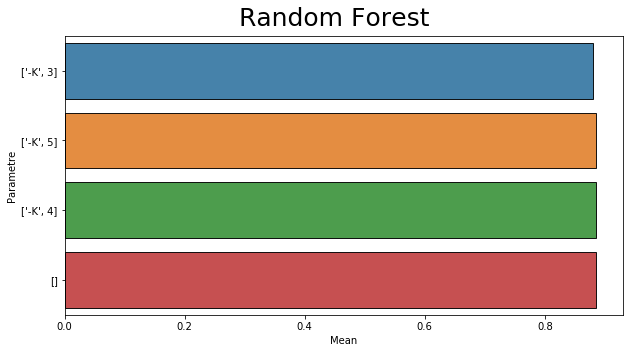

In [55]:
fig = plt.figure(figsize=(10,5))
title = fig.suptitle('Random Forest', fontsize=25)
fig.subplots_adjust(top=0.9, wspace=0.3)
ax = sns.barplot(x='mean', y='clf name & configuration', 
                 data=RandomForest, alpha=0.9, edgecolor='black')
ax.set_xlabel('Mean')
ax.set_ylabel('Parametre')

In [56]:
RandomForest.mean(axis=1)

27    0.880458
29    0.884462
31    0.885219
32    0.884717
dtype: float64

In [57]:
RandomForest.mean(axis=1).idxmax()

31

## 8. Multilayer Perceptron

In [58]:
MultilayerPerceptron = data_algo[data_algo['clf name & configuration']
                                 .str.contains('^weka.classifiers.functions.MultilayerPerceptron-*')].copy()

In [59]:
MultilayerPerceptron['clf name & configuration'] = MultilayerPerceptron['clf name & configuration'].str.replace('^w.*Perceptron-',
                                                                                                                '', regex=True)
MultilayerPerceptron

,clf name & configuration,AP,MagicTelescope,abalone,anneal,ar1,arrhythmia,audiology,autos,badges2,...,spambase,splice,teachingAssistant,tic-tac-toe,vote,vowel,waveform-5000,yeast,zoo,mean
34,"['-H', '24,24,12', '-N', '150', '-L', '0.1', '...",0.9017,0.8644,0.6586,0.7617,0.9256,0.5420,0.2522,0.3268,1.0,...,0.8142,0.7172,0.3245,0.9144,0.8943,0.0909,0.8600,0.3032,0.4059,0.611131
35,"['-H', '24,12,12', '-N', '150', '-L', '0.1', '...",0.9017,0.8645,0.6565,0.7617,0.9256,0.5420,0.2522,0.3268,1.0,...,0.8792,0.7028,0.3245,0.9165,0.8943,0.0909,0.8614,0.3032,0.4059,0.623119
36,"['-H', '64,36', '-N', '150', '-L', '0.1', '-V'...",0.9615,0.8631,0.6596,0.8018,0.9256,0.5619,0.5221,0.4634,1.0,...,0.8837,0.9414,0.3510,0.9791,0.9655,0.2232,0.8564,0.5101,0.6139,0.779356
38,"['-H', '72,24', '-N', '300', '-L', '0.05', '-V...",0.9594,0.8664,0.6655,0.7829,0.9256,0.5642,0.5088,0.4780,1.0,...,0.8865,0.9495,0.3377,0.9781,0.9701,0.3646,0.8638,0.4926,0.5347,0.779685
39,"['-H', '100,50', '-N', '150', '-L', '0.1', '-V...",0.9530,0.8644,0.6615,0.8096,0.9256,0.5575,0.5088,0.4683,1.0,...,0.8835,0.9448,0.3576,0.9770,0.9678,0.2606,0.8592,0.4919,0.6238,0.783974
41,"['-H', '24,24,24', '-N', '150', '-L', '0.1', '...",0.9124,0.8636,0.6591,0.7684,0.9256,0.5420,0.2522,0.3268,1.0,...,0.8815,0.7129,0.3311,0.9154,0.8943,0.0909,0.8598,0.3053,0.4059,0.647819
43,"['-H', '24,24', '-N', '100', '-L', '0.1', '-V'...",0.9573,0.8623,0.6526,0.7895,0.9256,0.5619,0.4469,0.4146,1.0,...,0.8809,0.7796,0.3311,0.9843,0.9724,0.0909,0.8620,0.4178,0.5743,0.758228
45,"['-H', '36,36', '-N', '150', '-L', '0.1', '-V'...",0.9530,0.8629,0.6634,0.7984,0.9256,0.5597,0.5044,0.4780,1.0,...,0.8839,0.9097,0.3642,0.9875,0.9655,0.2212,0.8634,0.4730,0.5941,0.778429
48,"['-H', '100', '-N', '100', '-L', '0.1', '-V', ...",0.9615,0.8631,0.6572,0.8697,0.9256,0.6527,0.7522,0.6732,1.0,...,0.8648,0.9354,0.5099,0.9802,0.9678,0.7505,0.8646,0.5728,0.9109,0.821361


Text(0, 0.5, 'Parametre')

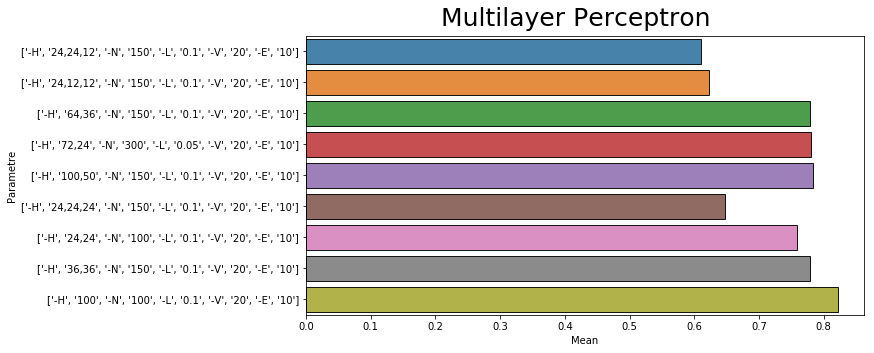

In [60]:
fig = plt.figure(figsize=(10,5))
title = fig.suptitle('Multilayer Perceptron', fontsize=25)
fig.subplots_adjust(top=0.9, wspace=0.3)
ax = sns.barplot(x='mean', y='clf name & configuration', 
                 data=MultilayerPerceptron, alpha=0.9, edgecolor='black')
ax.set_xlabel('Mean')
ax.set_ylabel('Parametre')

In [61]:
MultilayerPerceptron.mean(axis=1)

34    0.611131
35    0.623119
36    0.779356
38    0.779685
39    0.783974
41    0.647819
43    0.758228
45    0.778429
48    0.821361
dtype: float64

In [62]:
MultilayerPerceptron.mean(axis=1).idxmax()

48

## 9. IBk

In [63]:
IBk = data_algo[data_algo['clf name & configuration']
                .str.contains('^weka.classifiers.lazy.IBk-*')].copy()

In [64]:
IBk['clf name & configuration'] = IBk['clf name & configuration'].str.replace('^w.*IBk-',
                                                                              '', regex=True)
IBk

,clf name & configuration,AP,MagicTelescope,abalone,anneal,ar1,arrhythmia,audiology,autos,badges2,...,spambase,splice,teachingAssistant,tic-tac-toe,vote,vowel,waveform-5000,yeast,zoo,mean
37,"['-K', 3]",0.9530,0.8299,0.5954,0.8118,0.9091,0.5863,0.6504,0.7024,1.0,...,0.8992,0.7743,0.3775,0.9885,0.9402,0.9596,0.7748,0.5418,0.9109,0.816939
40,"['-K', 2]",0.9466,0.8126,0.5664,0.7673,0.9008,0.5796,0.6593,0.6878,1.0,...,0.8892,0.7238,0.3907,0.9885,0.9448,0.9737,0.7202,0.5047,0.9208,0.803883
44,"['-K', 1]",0.9444,0.8084,0.5758,0.7795,0.9091,0.5265,0.7345,0.7366,1.0,...,0.9020,0.7426,0.6291,0.9885,0.9448,0.9919,0.7394,0.5088,0.9406,0.806532
46,"['-K', 7]",0.9487,0.8377,0.6344,0.8096,0.9256,0.5796,0.6018,0.5707,1.0,...,0.9018,0.8160,0.4371,0.9885,0.9287,0.7657,0.7978,0.5681,0.9109,0.811571
49,"['-K', 5]",0.9509,0.8324,0.6258,0.8129,0.9256,0.5907,0.6239,0.6000,1.0,...,0.9042,0.7934,0.4040,0.9885,0.9379,0.8899,0.7856,0.5606,0.9406,0.817839


Text(0, 0.5, 'Parametre')

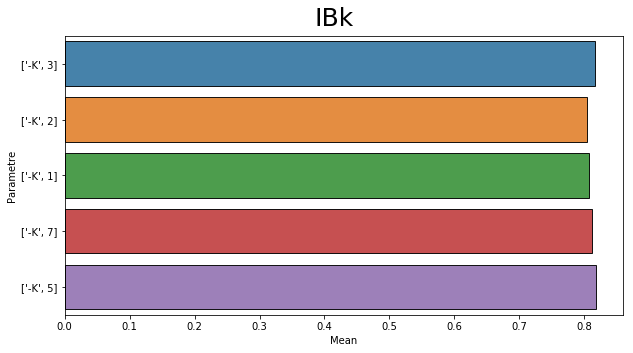

In [65]:
fig = plt.figure(figsize=(10,5))
title = fig.suptitle('IBk', fontsize=25)
fig.subplots_adjust(top=0.9, wspace=0.3)
ax = sns.barplot(x='mean', y='clf name & configuration',
                 data=IBk, alpha=0.9, edgecolor='black')
ax.set_xlabel('Mean')
ax.set_ylabel('Parametre')

In [66]:
IBk.mean(axis=1)

37    0.816939
40    0.803883
44    0.806532
46    0.811571
49    0.817839
dtype: float64

In [67]:
IBk.mean(axis=1).idxmax()

49

## 10. OneR

In [68]:
OneR = data_algo[data_algo['clf name & configuration']
                 .str.contains('^weka.classifiers.rules.OneR-*')].copy()

In [69]:
OneR['clf name & configuration'] = OneR['clf name & configuration'].str.replace('^w.*OneR-',
                                                                                '', regex=True)
OneR

,clf name & configuration,AP,MagicTelescope,abalone,anneal,ar1,arrhythmia,audiology,autos,badges2,...,spambase,splice,teachingAssistant,tic-tac-toe,vote,vowel,waveform-5000,yeast,zoo,mean
47,"['-B', 4]",0.9380,0.7011,0.5360,0.7962,0.9008,0.5774,0.4646,0.6537,1.0,...,0.7814,0.2436,0.4106,0.6994,0.9517,0.3242,0.5132,0.3989,0.4257,0.631311
51,"['-B', 32]",0.9081,0.7344,0.5942,0.7984,0.9008,0.5973,0.4646,0.5024,1.0,...,0.7824,0.2436,0.4106,0.6994,0.9517,0.3121,0.5522,0.3989,0.4257,0.632349
52,"['-B', 8]",0.9380,0.7160,0.5976,0.7984,0.9008,0.5774,0.4646,0.5463,1.0,...,0.7877,0.2436,0.4106,0.6994,0.9517,0.3172,0.5446,0.4036,0.4257,0.633414


Text(0, 0.5, 'Parametre')

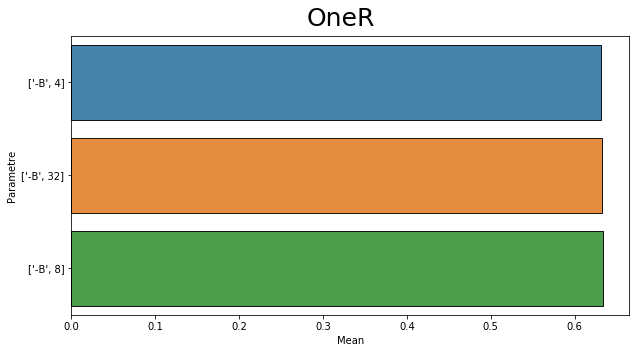

In [70]:
fig = plt.figure(figsize=(10,5))
title = fig.suptitle('OneR', fontsize=25)
fig.subplots_adjust(top=0.9, wspace=0.3)
ax = sns.barplot(x='mean', y='clf name & configuration',
                 data=OneR, alpha=0.9, edgecolor='black')
ax.set_xlabel('Mean')
ax.set_ylabel('Parametre')

In [71]:
OneR.mean(axis=1)

47    0.631311
51    0.632349
52    0.633414
dtype: float64

In [72]:
OneR.mean(axis=1).idxmax()

52

## 11. Simple Logistic

In [73]:
SimpleLogistic = data_algo[data_algo['clf name & configuration']
                           .str.contains('^weka.classifiers.functions.SimpleLogistic-*')].copy()

In [74]:
SimpleLogistic['clf name & configuration'] = SimpleLogistic['clf name & configuration'].str.replace('^w.*SimpleLogistic-',
                                                                                                    '', regex=True)
SimpleLogistic

,clf name & configuration,AP,MagicTelescope,abalone,anneal,ar1,arrhythmia,audiology,autos,badges2,...,spambase,splice,teachingAssistant,tic-tac-toe,vote,vowel,waveform-5000,yeast,zoo,mean
53,['-P'],0.9487,0.9999,0.6533,0.8842,0.9091,0.6748,0.8274,0.7463,1.0,...,0.9991,0.9994,0.5960,1.0,0.9747,0.8404,0.8662,0.5937,0.9109,0.865126
54,['-A'],0.9530,1.0000,0.6483,0.8864,0.9174,0.6836,0.8407,0.7512,1.0,...,0.9996,0.9994,0.5497,1.0,0.9724,0.8071,0.8674,0.5896,0.9208,0.862056
56,[],0.9530,0.9999,0.6514,0.8797,0.9174,0.7434,0.8186,0.7366,1.0,...,0.9993,0.9987,0.5166,1.0,0.9678,0.8212,0.8688,0.5970,0.9208,0.865376


Text(0, 0.5, 'Parametre')

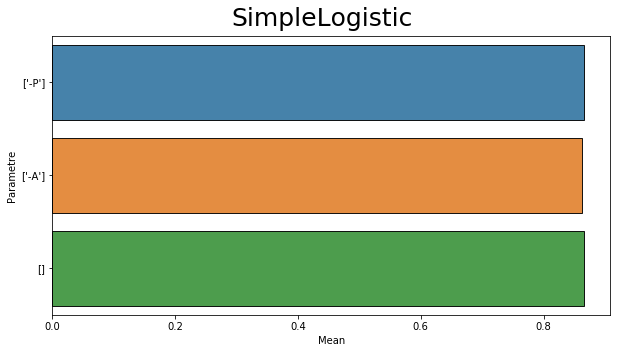

In [75]:
fig = plt.figure(figsize=(10,5))
title = fig.suptitle('SimpleLogistic', fontsize=25)
fig.subplots_adjust(top=0.9, wspace=0.3)
ax = sns.barplot(x='mean', y='clf name & configuration', 
                 data=SimpleLogistic, alpha=0.9, edgecolor='black')
ax.set_xlabel('Mean')
ax.set_ylabel('Parametre')

In [76]:
SimpleLogistic.mean(axis=1)

53    0.865126
54    0.862056
56    0.865376
dtype: float64

In [77]:
SimpleLogistic.mean(axis=1).idxmax()

56

## 12. Logistic

In [78]:
Logistic = data_algo[data_algo['clf name & configuration']
                     .str.contains('^weka.classifiers.functions.Logistic-*')].copy()

In [79]:
Logistic['clf name & configuration'] = Logistic['clf name & configuration'].str.replace('^w.*Logistic-',
                                                                                        '', regex=True)
Logistic

,clf name & configuration,AP,MagicTelescope,abalone,anneal,ar1,arrhythmia,audiology,autos,badges2,...,spambase,splice,teachingAssistant,tic-tac-toe,vote,vowel,waveform-5000,yeast,zoo,mean
57,"['-M', 100]",NaN,0.9997,0.6555,0.8686,0.8760,0.5310,0.8009,0.6732,0.9966,...,0.9909,0.9652,0.5960,1.0000,0.9632,0.8192,0.8662,0.5930,0.8515,0.835690
58,"['-M', 300]",NaN,0.9996,0.6555,0.8686,0.8843,0.5177,0.7965,0.6780,0.9966,...,0.9917,0.9382,0.5960,1.0000,0.9632,0.8152,0.8662,0.5930,0.8515,0.839286
60,[],NaN,0.7912,0.6555,0.8641,0.8760,0.5243,0.7832,0.7024,0.9966,...,0.9257,0.9000,0.5497,0.9812,0.9678,0.8152,0.8664,0.5863,0.8812,0.806794


Text(0, 0.5, 'Parametre')

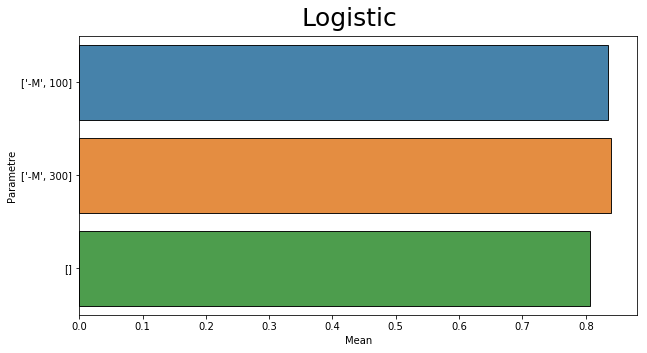

In [80]:
fig = plt.figure(figsize=(10,5))
title = fig.suptitle('Logistic', fontsize=25)
fig.subplots_adjust(top=0.9, wspace=0.3)
ax = sns.barplot(x='mean', y='clf name & configuration',
                 data=Logistic, alpha=0.9, edgecolor='black')
ax.set_xlabel('Mean')
ax.set_ylabel('Parametre')

In [81]:
Logistic.mean(axis=1)

57    0.835690
58    0.839286
60    0.806794
dtype: float64

In [82]:
Logistic.mean(axis=1).idxmax()

58

## 13. SMO

In [83]:
SMO = data_algo[data_algo['clf name & configuration']
                .str.contains('^weka.classifiers.functions.SMO-*')].copy()

In [84]:
SMO['clf name & configuration'] = SMO['clf name & configuration'].str.replace('^w.*SMO-',
                                                                              '', regex=True)
SMO

,clf name & configuration,AP,MagicTelescope,abalone,anneal,ar1,arrhythmia,audiology,autos,badges2,...,spambase,splice,teachingAssistant,tic-tac-toe,vote,vowel,waveform-5000,yeast,zoo,mean
55,"['-K', 'weka.classifiers.functions.supportVect...",0.8932,0.7797,0.5365,0.7617,0.9256,0.5420,0.4115,0.4341,1.0,...,0.7307,0.9611,0.3444,0.7296,0.9425,0.3394,0.8506,0.3120,0.6733,0.733497
59,[],0.9530,0.9920,0.6284,0.8719,0.9174,0.6969,0.8142,0.6927,1.0,...,0.9933,0.9602,0.5364,1.0000,0.9678,0.7010,0.8666,0.5694,0.9307,0.850218
61,"['-K', 'weka.classifiers.functions.supportVect...",0.7350,0.8618,0.6500,0.7751,0.9008,0.5420,0.5354,0.6439,1.0,...,0.9304,0.5630,0.5298,0.7787,0.9517,0.9384,0.8634,0.6132,0.7723,0.792472


Text(0, 0.5, 'Parametre')

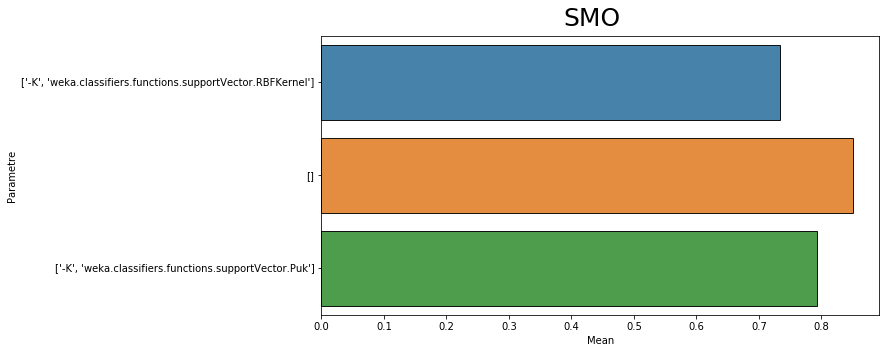

In [85]:
fig = plt.figure(figsize=(10,5))
title = fig.suptitle('SMO', fontsize=25)
fig.subplots_adjust(top=0.9, wspace=0.3)
ax = sns.barplot(x='mean', y='clf name & configuration', 
                 data=SMO, alpha=0.9, edgecolor='black')
ax.set_xlabel('Mean')
ax.set_ylabel('Parametre')

In [86]:
SMO.mean(axis=1)

55    0.733497
59    0.850218
61    0.792472
dtype: float64

In [87]:
SMO.mean(axis=1).idxmax()

59

## 13. Conclusion

|       Algorithm       |  Best Parameter                                                                                                            |
|:---------------------:|----------------------------------------------------------------------------------------------------------------------------|
|        BayesNet       | ['-Q', 'weka.classifiers.bayes.net.search.local.HillClimber', '-E', 'weka.classifiers.bayes.net.estimate.SimpleEstimator'] |
|      Naive Bayers     | ['-K']                                                                                                                     |
|       Rule Parts      | ['-C', 0.15, '-M', 2]                                                                                                      |
|       Rules Jrip      | ['-N', 2]                                                                                                                  |
|       Trees J48       | ['-M', 2]                                                                                                                  |
|      Random Tree      | []                                                                                                                         |
|     Random Forest     | ['-K', 4]                                                                                                                  |
| Multilayer Perceptron | ['-H', '100', '-N', '100', '-L', '0.1', '-V', '20', '-E', '10']                                                            |
|          IBk          | ['-K', 5]                                                                                                                  |
|          OneR         | ['-B', 8]                                                                                                                  |
|    Simple Logistic    | []                                                                                                                         |
|        Logistic       | ['-M', 300]                                                                                                                |
|          SMO          | []                                                                                                                         |